# Final Project | Data Mining II | Kelompok 12 | SD A1
## Social Media Mining

## Statistika Deskriptif

=== DATA LOADED ===
     Unnamed: 0                created_at  favorite_count  \
0  1.990000e+22 2025-11-19 00:42:26+00:00               1   
1  1.990000e+23 2025-11-19 00:43:10+00:00               0   
2  1.990000e+23 2025-11-19 00:43:10+00:00              27   
3  1.990000e+23 2025-11-19 00:44:13+00:00               0   
4  1.990000e+23 2025-11-19 00:50:42+00:00               0   

                                           full_text        id_str  \
0  @Ajierz @jatamnas banyak yg bilang praktekå_ y...  1.990000e+18   
1  @prabowo Izin menolak ruu kuhap isinya terlalu...  1.990000e+18   
2  @fluoxetan Zionis selalu geser gawang wkwkwkwk...  1.990000e+18   
3  @DPR_RI Izin menolak ruu kuhap isinya terlalu ...  1.990000e+18   
4  RUU KUHAP ini bikin makin percaya sama hukum g...  1.990000e+18   

                                         image_url in_reply_to_screen_name  \
0                                              NaN                  Ajierz   
1                                   

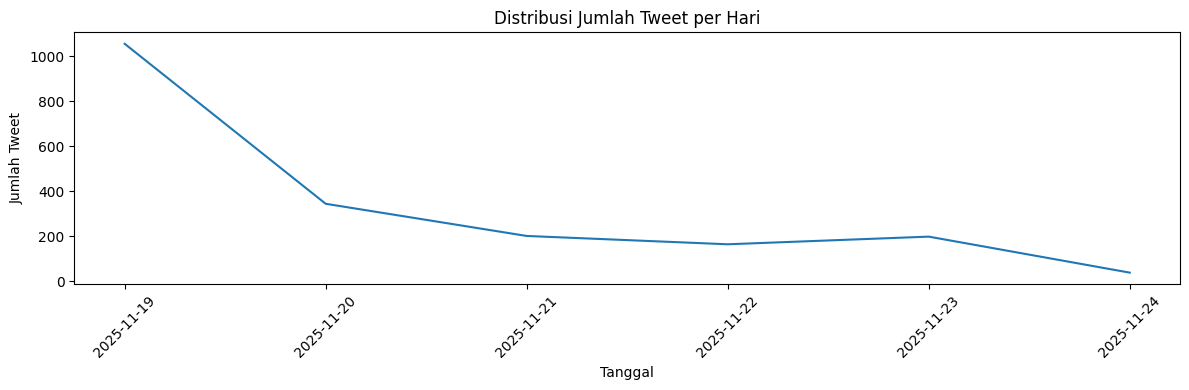


=== ANALISIS ENGAGEMENT ===
       favorite_count  retweet_count  reply_count  quote_count
count     2000.000000     2000.00000  2000.000000  2000.000000
mean        15.916000        4.61450     0.672000     0.370000
std        268.132867       69.69031     4.047791     8.772091
min          0.000000        0.00000     0.000000     0.000000
25%          0.000000        0.00000     0.000000     0.000000
50%          0.000000        0.00000     0.000000     0.000000
75%          1.000000        0.00000     1.000000     0.000000
max       8669.000000     2563.00000   145.000000   351.000000


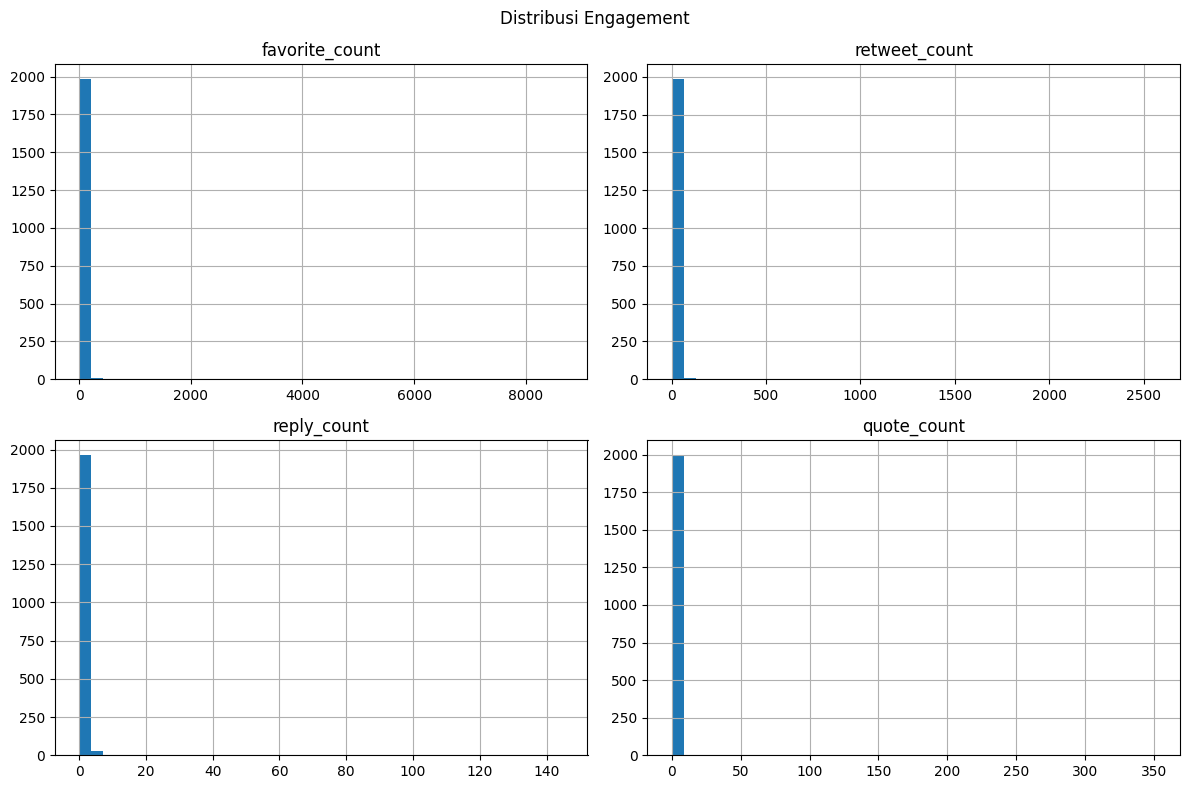

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# 1. LOAD DATA
# ==========================================================
df = pd.read_csv("/content/data_kuhap.csv", encoding='latin1', sep=';')

if "created_at" in df.columns:
    df["created_at"] = pd.to_datetime(df["created_at"], errors='coerce')

print("=== DATA LOADED ===")
print(df.head())
print("\nJumlah baris:", len(df))
print("Jumlah kolom:", len(df.columns))


# ==========================================================
# 2. CEK STRUKTUR DATA
# ==========================================================
print("\n=== INFO ===")
print(df.info())

print("\n=== MISSING VALUES ===")
print(df.isna().sum())


# ==========================================================
# 3. STATISTIK DESKRIPTIF UNTUK KOLOM NUMERIK
# ==========================================================
print("\n=== DESCRIPTIVE STATISTICS (NUMERIC) ===")
print(df.describe())


# ==========================================================
# 4. ANALISIS DESKRIPTIF UNTUK KOLOM TEKS
# ==========================================================
text_columns = [col for col in df.columns if df[col].dtype == 'object']

print("\n=== TEXT COLUMNS ===")
print(text_columns)

if len(text_columns) > 0:
    for col in text_columns:
        print(f"\n--- Analisis kolom teks: {col} ---")
        print("Jumlah data unik :", df[col].nunique())
        print("Contoh data       :", df[col].iloc[0])
        print("Panjang rata-rata :", df[col].astype(str).apply(len).mean())


# ==========================================================
# 5. DISTRIBUSI WAKTU (JIKA ADA TIMESTAMP)
# ==========================================================
if "created_at" in df.columns:
    df["date"] = df["created_at"].dt.date

    print("\n=== WAKTU MULAI & AKHIR ===")
    print("Tanggal paling awal :", df["created_at"].min())
    print("Tanggal paling akhir:", df["created_at"].max())

    print("\n=== TOP 10 HARI TERBANYAK ===")
    print(df["date"].value_counts().head(10))

    # Visualisasi distribusi
    plt.figure(figsize=(12,4))
    df["date"].value_counts().sort_index().plot()
    plt.title("Distribusi Jumlah Tweet per Hari")
    plt.xlabel("Tanggal")
    plt.ylabel("Jumlah Tweet")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# ==========================================================
# 6. ANALISIS PANJANG TEKS (Jika ada kolom teks utama)
# ==========================================================
candidate_text_cols = ["text", "tweet", "content"]
main_text_col = None

for c in candidate_text_cols:
    if c in df.columns:
        main_text_col = c
        break

if main_text_col:
    df["text_length"] = df[main_text_col].astype(str).apply(len)

    print("\n=== ANALISIS PANJANG TEKS ===")
    print(df["text_length"].describe())

    plt.figure(figsize=(8,4))
    plt.hist(df["text_length"], bins=50)
    plt.title("Distribusi Panjang Teks")
    plt.xlabel("Panjang karakter")
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()


# ==========================================================
# 7. ANALISIS ENGAGEMENT
# ==========================================================
eng_cols = ["like", "likes", "favorite_count", "retweet", "retweet_count",
            "reply_count", "quote_count", "view_count"]

eng_cols_available = [c for c in eng_cols if c in df.columns]

if len(eng_cols_available) > 0:
    print("\n=== ANALISIS ENGAGEMENT ===")
    print(df[eng_cols_available].describe())

    # Visualisasi engagement
    df[eng_cols_available].hist(bins=40, figsize=(12,8))
    plt.suptitle("Distribusi Engagement")
    plt.tight_layout()
    plt.show()

else:
    print("\n(Tidak ada kolom engagement yang ditemukan)")


# ==========================================================
# 8. TOPIK / HASHTAG
# ==========================================================
if main_text_col:
    print("\n=== TOP 20 KATA TERBANYAK ===")
    from collections import Counter
    words = " ".join(df[main_text_col].astype(str)).lower().split()
    word_freq = Counter(words).most_common(20)
    print(word_freq)

## Exploratory Data Analysis

In [5]:
import pandas as pd

df_d = df

df_d['created_at'] = pd.to_datetime(df_d['created_at'])

by_date = pd.Series(df_d['created_at'].dt.date).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='counts')

df_date


date  counts
0 2025-11-19    1055
1 2025-11-20     344
2 2025-11-21     201
3 2025-11-22     164
4 2025-11-23     198
5 2025-11-24      38

In [6]:
import plotly.express as px
import plotly.graph_objs as go
fig = go.Figure(data=go.Scatter(x=df_date['date'].astype(dtype=str),
                                y=df_date['counts'],
                                marker_color='black', text="counts"))
fig.update_layout({"title": 'Tweet tentang Pengesahan RUU KUHAP dalam seminggu terakhir',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Total tweets"},
                   "showlegend": False})
fig.show()

In [12]:
most_retweeted_tweet = df.nlargest(1, 'retweet_count', 'all')
most_liked_tweet = df.nlargest(1, 'favorite_count', 'all')
most_replied_tweet = df.nlargest(1, 'reply_count', 'all')

most_retweeted_info = pd.DataFrame({
    'Username': most_retweeted_tweet['user_id_str'],
    'Full Text': most_retweeted_tweet['full_text'],
    'Created At': most_retweeted_tweet['created_at'],
    'Retweet Count': most_retweeted_tweet['retweet_count']
})

most_liked_info = pd.DataFrame({
    'Username': most_liked_tweet['user_id_str'],
    'Full Text': most_liked_tweet['full_text'],
    'Created At': most_liked_tweet['created_at'],
    'Favorite Count': most_liked_tweet['favorite_count'],
    'Quote Count': most_liked_tweet['quote_count']
})

most_replied_info = pd.DataFrame({
    'Username': most_replied_tweet['user_id_str'],
    'Full Text': most_replied_tweet['full_text'],
    'Created At': most_replied_tweet['created_at'],
    'Reply Count': most_replied_tweet['reply_count']
})

In [ ]:
most_retweeted_info

Username                                          Full Text  \
1731       NaN  #intinyadeh WA mama TS diretas trus nelfon TS ...   

                    Created At  Retweet Count  
1731 2025-11-22 14:52:48+00:00           2563

In [ ]:
most_liked_info

Username                                          Full Text  \
1664       NaN  dia nelfon bilang tolong tweet terakhir akun w...   

                    Created At  Favorite Count  Quote Count  
1664 2025-11-22 08:38:36+00:00            8669          351

In [ ]:
most_replied_info

Username                                          Full Text  \
1731       NaN  #intinyadeh WA mama TS diretas trus nelfon TS ...   

                    Created At  Reply Count  
1731 2025-11-22 14:52:48+00:00          145

In [13]:
possible_text_cols = ["text", "full_text", "tweet", "content", "body", "caption", "status"]

detected_text_col = None
for col in df.columns:
    if col.lower() in possible_text_cols:
        detected_text_col = col
        break

if detected_text_col is None:
    obj_cols = df.select_dtypes(include="object").columns
    for col in obj_cols:
        avg_len = df[col].astype(str).apply(len).mean()
        if avg_len > 10:
            detected_text_col = col
            break

if detected_text_col is None:
    print("❌ Tidak menemukan kolom teks. Berikut daftar kolom yang tersedia:")
    print(df.columns)
else:
    print(f"✅ Kolom teks terdeteksi: {detected_text_col}")

✅ Kolom teks terdeteksi: full_text


In [14]:
text_col = detected_text_col
df[text_col] = df[text_col].astype(str)


In [15]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df[text_col].apply(clean_text)


In [16]:
from sklearn.feature_extraction.text import CountVectorizer

vec_uni = CountVectorizer(ngram_range=(1,1), min_df=5).fit(df["clean_text"])
vec_bi  = CountVectorizer(ngram_range=(2,2), min_df=5).fit(df["clean_text"])
vec_tri = CountVectorizer(ngram_range=(3,3), min_df=5).fit(df["clean_text"])

# Unigram
unigram_freq = pd.DataFrame(
    vec_uni.transform(df["clean_text"]).sum(axis=0).tolist()[0],
    index=vec_uni.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

# Bigram
bigram_freq = pd.DataFrame(
    vec_bi.transform(df["clean_text"]).sum(axis=0).tolist()[0],
    index=vec_bi.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

# Trigram
trigram_freq = pd.DataFrame(
    vec_tri.transform(df["clean_text"]).sum(axis=0).tolist()[0],
    index=vec_tri.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

print(unigram_freq.head(20))
print(bigram_freq.head(20))
print(trigram_freq.head(20))


              count
kuhap          2401
dan            1262
ruu            1115
hoax           1034
yang            718
di              714
ini             556
tentang         520
disinformasi    484
lawan           476
itu             452
penyadapan      445
uu              443
baru            412
izin            330
kita            321
hukum           310
yg              303
dpr             295
dengan          294
                    count
ruu kuhap             839
tentang kuhap         477
hoax tentang          476
lawan disinformasi    475
disinformasi dan      474
dan hoax              472
kuhap baru            252
izin pengadilan       248
di ruu                200
uu khusus             193
kuhap dan             152
kuhap yang            151
uu kuhap              139
diatur di             134
undang undang         117
wajib izin             84
dpr ri                 83
di uu                  74
kita lawan             67
kuhap ini              66
                          count
ho

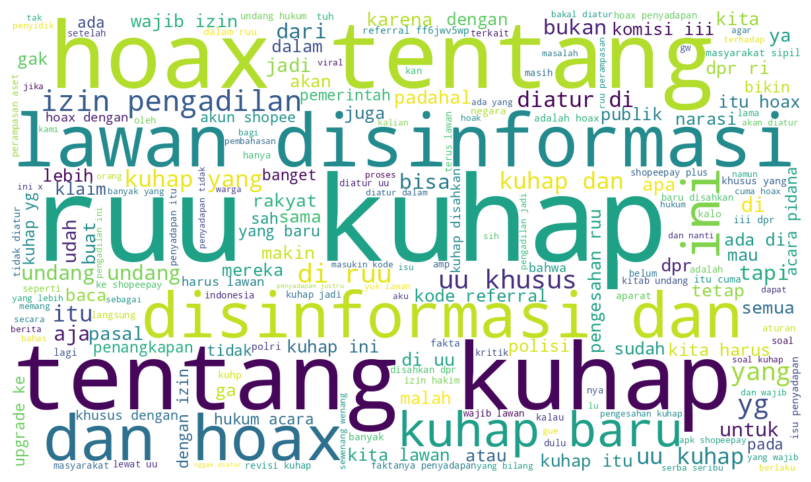

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=1200, height=700, background_color="white").generate(
    " ".join(df["clean_text"])
)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [20]:
pip install sastrawi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


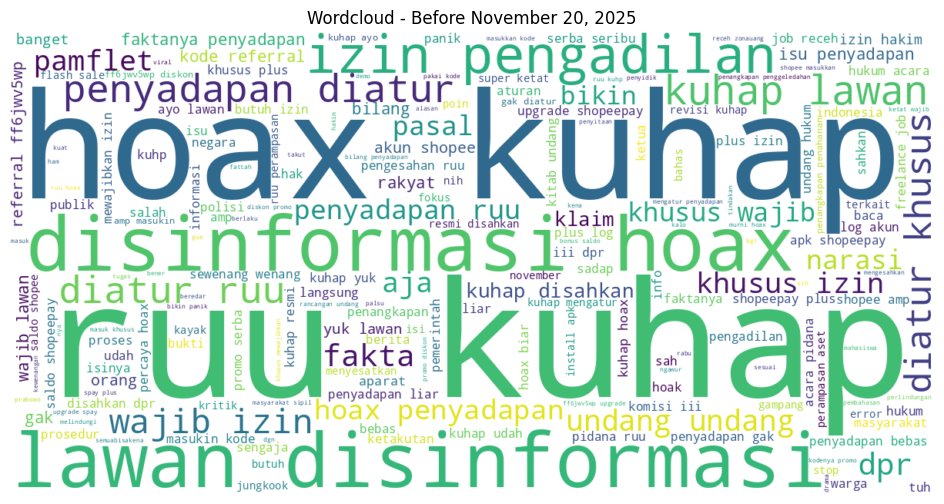

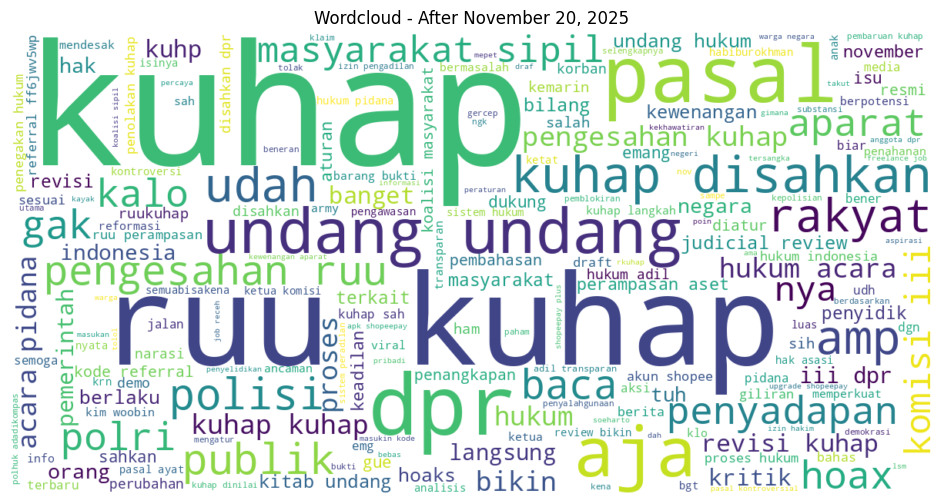

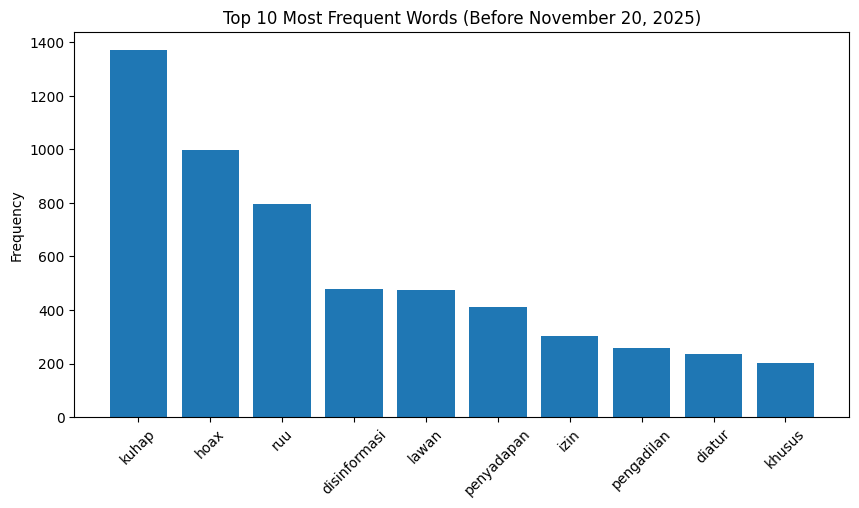

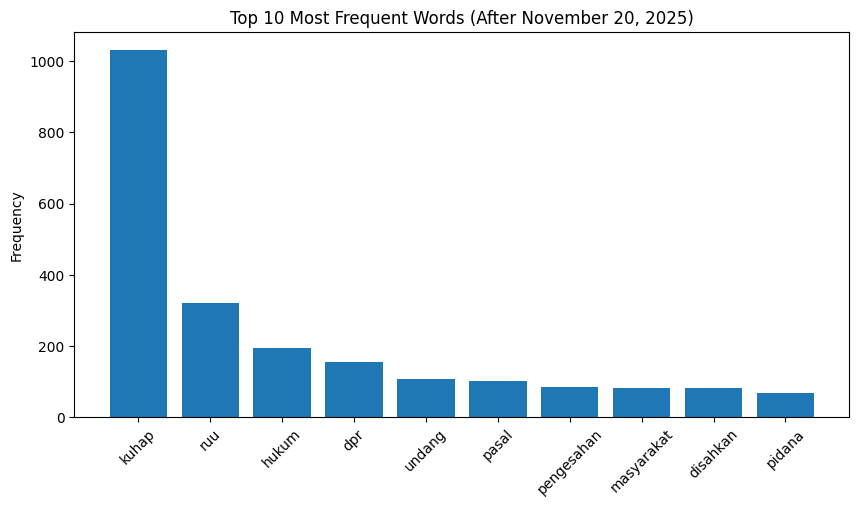

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# ----------------------------------------------------------
# 1. STOPWORDS LIBRARY (Sastrawi + NLTK + WordCloud)
# ----------------------------------------------------------
sastrawi_sw = set(StopWordRemoverFactory().get_stop_words())
nltk_sw = set(stopwords.words("indonesian"))
wordcloud_sw = set(STOPWORDS)

full_stopwords = sastrawi_sw.union(nltk_sw).union(wordcloud_sw)

# ----------------------------------------------------------
# 2. LOAD + SPLIT DATA
# ----------------------------------------------------------
df["date"] = pd.to_datetime(df["date"], utc=True)
cutoff = pd.Timestamp("2025-11-20", tz="UTC")

df_before = df[df["date"] < cutoff].copy()
df_after  = df[df["date"] >= cutoff].copy()

# ----------------------------------------------------------
# 3. CLEANING FUNCTION
# ----------------------------------------------------------
def clean_text_simple(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = [
        t for t in text.split()
        if t not in full_stopwords and len(t) > 2
    ]

    return " ".join(tokens)

if not df_before.empty:
    df_before["clean"] = df_before["clean_text"].apply(clean_text_simple)
else:
    print("df_before is empty. Cannot perform cleaning.")

if not df_after.empty:
    df_after["clean"]  = df_after["clean_text"].apply(clean_text_simple)
else:
    print("df_after is empty. Cannot perform cleaning.")

# ----------------------------------------------------------
# 4. WORDCLOUD BEFORE
# ----------------------------------------------------------
if not df_before.empty:
    text_before = " ".join(df_before["clean"])
    if text_before:
        wc_before = WordCloud(
            width=1200,
            height=600,
            background_color="white",
            stopwords=full_stopwords
        ).generate(text_before)

        plt.figure(figsize=(14,6))
        plt.imshow(wc_before, interpolation="bilinear")
        plt.axis("off")
        plt.title("Wordcloud - Before November 20, 2025")
        plt.show()
    else:
        print("No words to generate word cloud for df_before after cleaning.")
else:
    print("df_before is empty. Skipping word cloud generation.")

# ----------------------------------------------------------
# 5. WORDCLOUD AFTER
# ----------------------------------------------------------
if not df_after.empty:
    text_after = " ".join(df_after["clean"])
    if text_after:
        wc_after = WordCloud(
            width=1200,
            height=600,
            background_color="white",
            stopwords=full_stopwords
        ).generate(text_after)

        plt.figure(figsize=(14,6))
        plt.imshow(wc_after, interpolation="bilinear")
        plt.axis("off")
        plt.title("Wordcloud - After November 20, 2025")
        plt.show()
    else:
        print("No words to generate word cloud for df_after after cleaning.")
else:
    print("df_after is empty. Skipping word cloud generation.")

# ----------------------------------------------------------
# 6. TOP 10 MOST FREQUENT WORDS
# ----------------------------------------------------------
def get_top_words(series, top_n=10):
    words = " ".join(series).split()
    counter = Counter(words)
    return counter.most_common(top_n)

# BEFORE
if not df_before.empty and not df_before["clean"].empty:
    top_before = get_top_words(df_before["clean"])
    if top_before:
        words_b, freq_b = zip(*top_before)

        plt.figure(figsize=(10,5))
        plt.bar(words_b, freq_b)
        plt.xticks(rotation=45)
        plt.title("Top 10 Most Frequent Words (Before November 20, 2025)")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No top words found for df_before.")
else:
    print("df_before is empty or clean column is empty. Skipping top words.")

# AFTER
if not df_after.empty and not df_after["clean"].empty:
    top_after = get_top_words(df_after["clean"])
    if top_after:
        words_a, freq_a = zip(*top_after)

        plt.figure(figsize=(10,5))
        plt.bar(words_a, freq_a)
        plt.xticks(rotation=45)
        plt.title("Top 10 Most Frequent Words (After November 20, 2025)")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No top words found for df_after.")
else:
    print("df_after is empty or clean column is empty. Skipping top words.")

In [22]:
df.head()


Unnamed: 0                created_at  favorite_count  \
0  1.990000e+22 2025-11-19 00:42:26+00:00               1   
1  1.990000e+23 2025-11-19 00:43:10+00:00               0   
2  1.990000e+23 2025-11-19 00:43:10+00:00              27   
3  1.990000e+23 2025-11-19 00:44:13+00:00               0   
4  1.990000e+23 2025-11-19 00:50:42+00:00               0   

                                           full_text        id_str  \
0  @Ajierz @jatamnas banyak yg bilang praktekå_ y...  1.990000e+18   
1  @prabowo Izin menolak ruu kuhap isinya terlalu...  1.990000e+18   
2  @fluoxetan Zionis selalu geser gawang wkwkwkwk...  1.990000e+18   
3  @DPR_RI Izin menolak ruu kuhap isinya terlalu ...  1.990000e+18   
4  RUU KUHAP ini bikin makin percaya sama hukum g...  1.990000e+18   

                                         image_url in_reply_to_screen_name  \
0                                              NaN                  Ajierz   
1                                              NaN                 prabowo   
2  https://pbs.twimg.com/media/G6FAltNbMAUN0Sp.jpg               fluoxetan   
3                                              NaN                  DPR_RI   
4  https://pbs.twimg.com/media/G6FCpY-bMAEMgjO.jpg                     NaN   

  lang  location  quote_count  reply_count  retweet_count  \
0   in       NaN            0            0              0   
1   in       NaN            0            0              0   
2   in       NaN            1            1              8   
3   in       NaN            0            0              0   
4   in       NaN            0            1              0   

                                           tweet_url   user_id_str  Sentimen  \
0  https://x.com/undefined/status/199094371782668...  1.100000e+18         1   
1  https://x.com/undefined/status/199094389953228...  1.780000e+18         0   
2  https://x.com/undefined/status/199094390245157...  2.310000e+09         0   
3  https://x.com/undefined/status/199094416668014...  1.780000e+18         0   
4  https://x.com/undefined/status/199094579741715...  1.600000e+18         2   

                       date                                         clean_text  
0 2025-11-19 00:00:00+00:00  banyak yg bilang praktek yg ada di ruu kuhap i...  
1 2025-11-19 00:00:00+00:00     izin menolak ruu kuhap isinya terlalu mengatur  
2 2025-11-19 00:00:00+00:00  zionis selalu geser gawang wkwkwkwk sok bahas ...  
3 2025-11-19 00:00:00+00:00     izin menolak ruu kuhap isinya terlalu mengatur  
4 2025-11-19 00:00:00+00:00  ruu kuhap ini bikin makin percaya sama hukum g...

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df=5, max_df=0.7)
X_tfidf = tfidf.fit_transform(df["clean_text"])

tfidf_scores = zip(tfidf.get_feature_names_out(), X_tfidf.sum(axis=0).tolist()[0])
tfidf_sorted = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

print("\nTOP 30 TF-IDF Words:")
for w, s in tfidf_sorted[:30]:
    print(w, ":", round(s, 3))



TOP 30 TF-IDF Words:
hoax : 120.919
ruu : 117.429
dan : 112.54
yang : 78.421
di : 78.164
ini : 65.966
penyadapan : 64.245
tentang : 64.111
baru : 62.215
disinformasi : 59.966
uu : 59.46
lawan : 59.094
itu : 57.669
izin : 46.424
kita : 46.042
hukum : 45.928
yg : 44.2
dpr : 42.668
dengan : 41.353
pengadilan : 40.761
ada : 40.18
diatur : 40.004
jadi : 38.596
undang : 36.221
bisa : 35.387
khusus : 34.053
tidak : 33.799
disahkan : 33.42
untuk : 30.284
dalam : 29.736


### Topic Modelling (LDA)

In [26]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 5
lda = LDA(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

terms = tfidf.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\n=== TOPIK {idx+1} ===")
    print([terms[i] for i in topic.argsort()[-15:]])


=== TOPIK 1 ===
['apa', 'transparan', 'pengesahan', 'keadilan', 'dukung', 'adil', 'dan', 'ini', 'disahkan', 'lebih', 'yang', 'yg', 'hukum', 'ruu', 'baru']

=== TOPIK 2 ===
['sama', 'mau', 'uu', 'itu', 'ya', 'sah', 'yang', 'aja', 'udah', 'bisa', 'baru', 'ini', 'ruu', 'yg', 'di']

=== TOPIK 3 ===
['plus', 'ke', '000', 'ff6jwv5wp', 'promo', 'zonauang', 'upgrade', 'saldo', 'amp', 'referral', '10', 'kode', 'akun', 'shopee', 'shopeepay']

=== TOPIK 4 ===
['yang', 'khusus', 'kita', 'di', 'diatur', 'pengadilan', 'itu', 'izin', 'ruu', 'lawan', 'disinformasi', 'tentang', 'penyadapan', 'dan', 'hoax']

=== TOPIK 5 ===
['uu', 'menjadi', 'iii', 'ruu', 'yang', 'dalam', 'komisi', 'sipil', 'pidana', 'masyarakat', 'baru', 'hukum', 'ri', 'dpr', 'undang']


### Pembersihan Teks Lanjutan dengan Penghapusan Stopword

Untuk mendapatkan hasil yang lebih bermakna pada analisis frekuensi kata, word cloud, dan topic modeling, kita akan melakukan pembersihan teks ulang dengan menyertakan penghapusan _stopword_ (kata-kata umum yang kurang bermakna seperti "dan", "atau", "yang") menggunakan pustaka Sastrawi, NLTK, dan daftar _stopword_ dari WordCloud.

In [27]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

!pip install Sastrawi
import nltk
nltk.download('stopwords')

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords

sastrawi_sw = set(StopWordRemoverFactory().get_stop_words())
nltk_sw = set(stopwords.words('indonesian'))
wordcloud_sw = set(STOPWORDS)

full_stopwords = sastrawi_sw.union(nltk_sw).union(wordcloud_sw)

if 'text_col' not in locals() or text_col is None:
    candidate_text_cols = ["text", "full_text", "tweet", "content", "body", "caption", "status"]
    for col in df.columns:
        if col.lower() in candidate_text_cols:
            text_col = col
            break
    if text_col is None:
        obj_cols = df.select_dtypes(include="object").columns
        for col in obj_cols:
            avg_len = df[col].astype(str).apply(len).mean()
            if avg_len > 10:
                text_col = col
                break
    print(f"Kolom teks terdeteksi: {text_col}")

# Fungsi pembersihan teks dengan penghapusan stopword
def clean_text_with_stopwords(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = [word for word in text.split() if word not in full_stopwords and len(word) > 2]
    return " ".join(tokens)

df["clean_text_stopwords"] = df[text_col].apply(clean_text_with_stopwords)

print("Contoh teks setelah pembersihan dan penghapusan stopword:")
print(df["clean_text_stopwords"].head())

Contoh teks setelah pembersihan dan penghapusan stopword:
0    bilang praktek ruu kuhap sebenernya udah dilak...
1               izin menolak ruu kuhap isinya mengatur
2    zionis geser gawang wkwkwkwk sok bahas ruu kuh...
3               izin menolak ruu kuhap isinya mengatur
4    ruu kuhap bikin percaya hukum gak korban revis...
Name: clean_text_stopwords, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Analisis Frekuensi Kata (N-gram) Setelah Penghapusan Stopword

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Unigram
vec_uni_sw = CountVectorizer(ngram_range=(1,1), min_df=5).fit(df["clean_text_stopwords"])
unigram_freq_sw = pd.DataFrame(
    vec_uni_sw.transform(df["clean_text_stopwords"]).sum(axis=0).tolist()[0],
    index=vec_uni_sw.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

# Bigram
vec_bi_sw = CountVectorizer(ngram_range=(2,2), min_df=5).fit(df["clean_text_stopwords"])
bigram_freq_sw = pd.DataFrame(
    vec_bi_sw.transform(df["clean_text_stopwords"]).sum(axis=0).tolist()[0],
    index=vec_bi_sw.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

# Trigram
vec_tri_sw = CountVectorizer(ngram_range=(3,3), min_df=5).fit(df["clean_text_stopwords"])
trigram_freq_sw = pd.DataFrame(
    vec_tri_sw.transform(df["clean_text_stopwords"]).sum(axis=0).tolist()[0],
    index=vec_tri_sw.get_feature_names_out(),
    columns=["count"]
).sort_values("count", ascending=False)

print("\nTOP 20 Unigram (setelah penghapusan stopword):")
print(unigram_freq_sw.head(20))
print("\nTOP 20 Bigram (setelah penghapusan stopword):")
print(bigram_freq_sw.head(20))
print("\nTOP 20 Trigram (setelah penghapusan stopword):")
print(trigram_freq_sw.head(20))


TOP 20 Unigram (setelah penghapusan stopword):
              count
kuhap          2401
ruu            1115
hoax           1034
disinformasi    484
lawan           476
penyadapan      445
izin            330
hukum           310
dpr             295
pengadilan      277
diatur          252
undang          237
khusus          208
pasal           168
wajib           168
disahkan        163
amp             144
pengesahan      134
pidana          129
bikin           126

TOP 20 Bigram (setelah penghapusan stopword):
                    count
ruu kuhap             839
hoax kuhap            484
lawan disinformasi    475
disinformasi hoax     472
izin pengadilan       251
kuhap lawan           124
undang undang         117
penyadapan diatur     116
diatur ruu            107
kuhap disahkan        102
diatur khusus          99
wajib izin             88
pengesahan ruu         63
komisi iii             60
kode referral          60
khusus izin            59
penyadapan ruu         56
hukum acara      

### Word Cloud Global Setelah Penghapusan Stopword

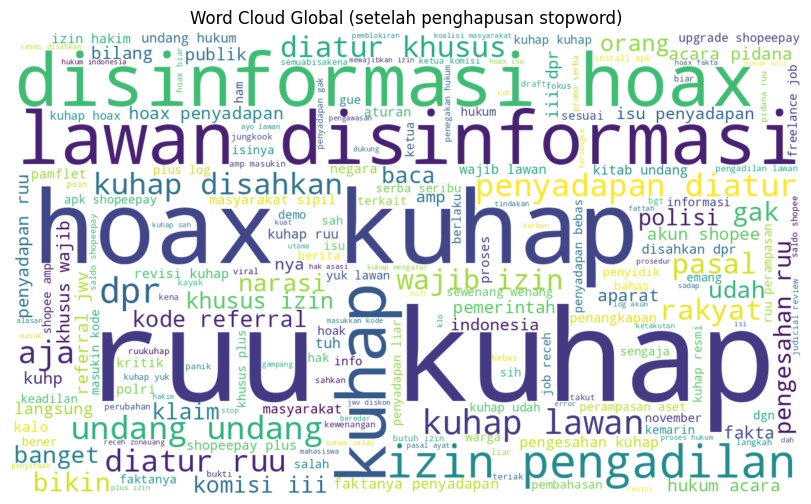

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_sw = WordCloud(width=1200, height=700, background_color="white", stopwords=full_stopwords).generate(
    " ".join(df["clean_text_stopwords"])
)

plt.figure(figsize=(12,6))
plt.imshow(wc_sw, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud Global (setelah penghapusan stopword)")
plt.show()

### TF-IDF dan Topic Modeling (LDA) Setelah Penghapusan Stopword

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

# TF-IDF Vectorization dengan teks yang sudah dihapus stopword
tfidf_sw = TfidfVectorizer(min_df=5, max_df=0.7)
X_tfidf_sw = tfidf_sw.fit_transform(df["clean_text_stopwords"])

tfidf_scores_sw = zip(tfidf_sw.get_feature_names_out(), X_tfidf_sw.sum(axis=0).tolist()[0])
tfidf_sorted_sw = sorted(tfidf_scores_sw, key=lambda x: x[1], reverse=True)

print("\nTOP 30 TF-IDF Words (setelah penghapusan stopword):")
for w, s in tfidf_sorted_sw[:30]:
    print(w, ":", round(s, 3))

# LDA Topic Modeling
n_topics_sw = 5  # Jumlah topik bisa disesuaikan
lda_sw = LDA(n_components=n_topics_sw, random_state=42)
lda_sw.fit(X_tfidf_sw)

terms_sw = tfidf_sw.get_feature_names_out()

print("\n--- Topic Modeling (LDA) Setelah Penghapusan Stopword ---")
for idx, topic in enumerate(lda_sw.components_):
    print(f"\n=== TOPIK {idx+1} ===")
    print([terms_sw[i] for i in topic.argsort()[-15:]])


TOP 30 TF-IDF Words (setelah penghapusan stopword):
hoax : 159.725
ruu : 153.589
penyadapan : 85.627
disinformasi : 79.26
lawan : 78.225
izin : 60.937
hukum : 56.827
dpr : 53.9
pengadilan : 53.134
diatur : 53.042
khusus : 45.049
disahkan : 43.572
undang : 42.938
pasal : 37.571
wajib : 37.468
pengesahan : 35.515
aja : 32.028
bikin : 31.206
gak : 30.302
udah : 28.845
masyarakat : 28.596
amp : 26.432
rakyat : 25.279
pidana : 25.21
isu : 24.106
fakta : 22.284
bebas : 21.771
publik : 21.398
indonesia : 21.043
klaim : 20.795

--- Topic Modeling (LDA) Setelah Penghapusan Stopword ---

=== TOPIK 1 ===
['review', 'disahin', 'demo', 'transparan', 'mahasiswa', 'penolakan', 'teriak', 'gak', 'hukum', 'adil', 'bikin', 'tolak', 'pengesahan', 'dukung', 'ruu']

=== TOPIK 2 ===
['revisi', 'kuhp', 'pasal', 'iii', 'komisi', 'sipil', 'pengesahan', 'rakyat', 'pidana', 'masyarakat', 'ruu', 'hukum', 'disahkan', 'undang', 'dpr']

=== TOPIK 3 ===
['gue', 'saldo', 'upgrade', 'referral', 'kode', 'amp', 'langsung

### Visualisasi Clustering

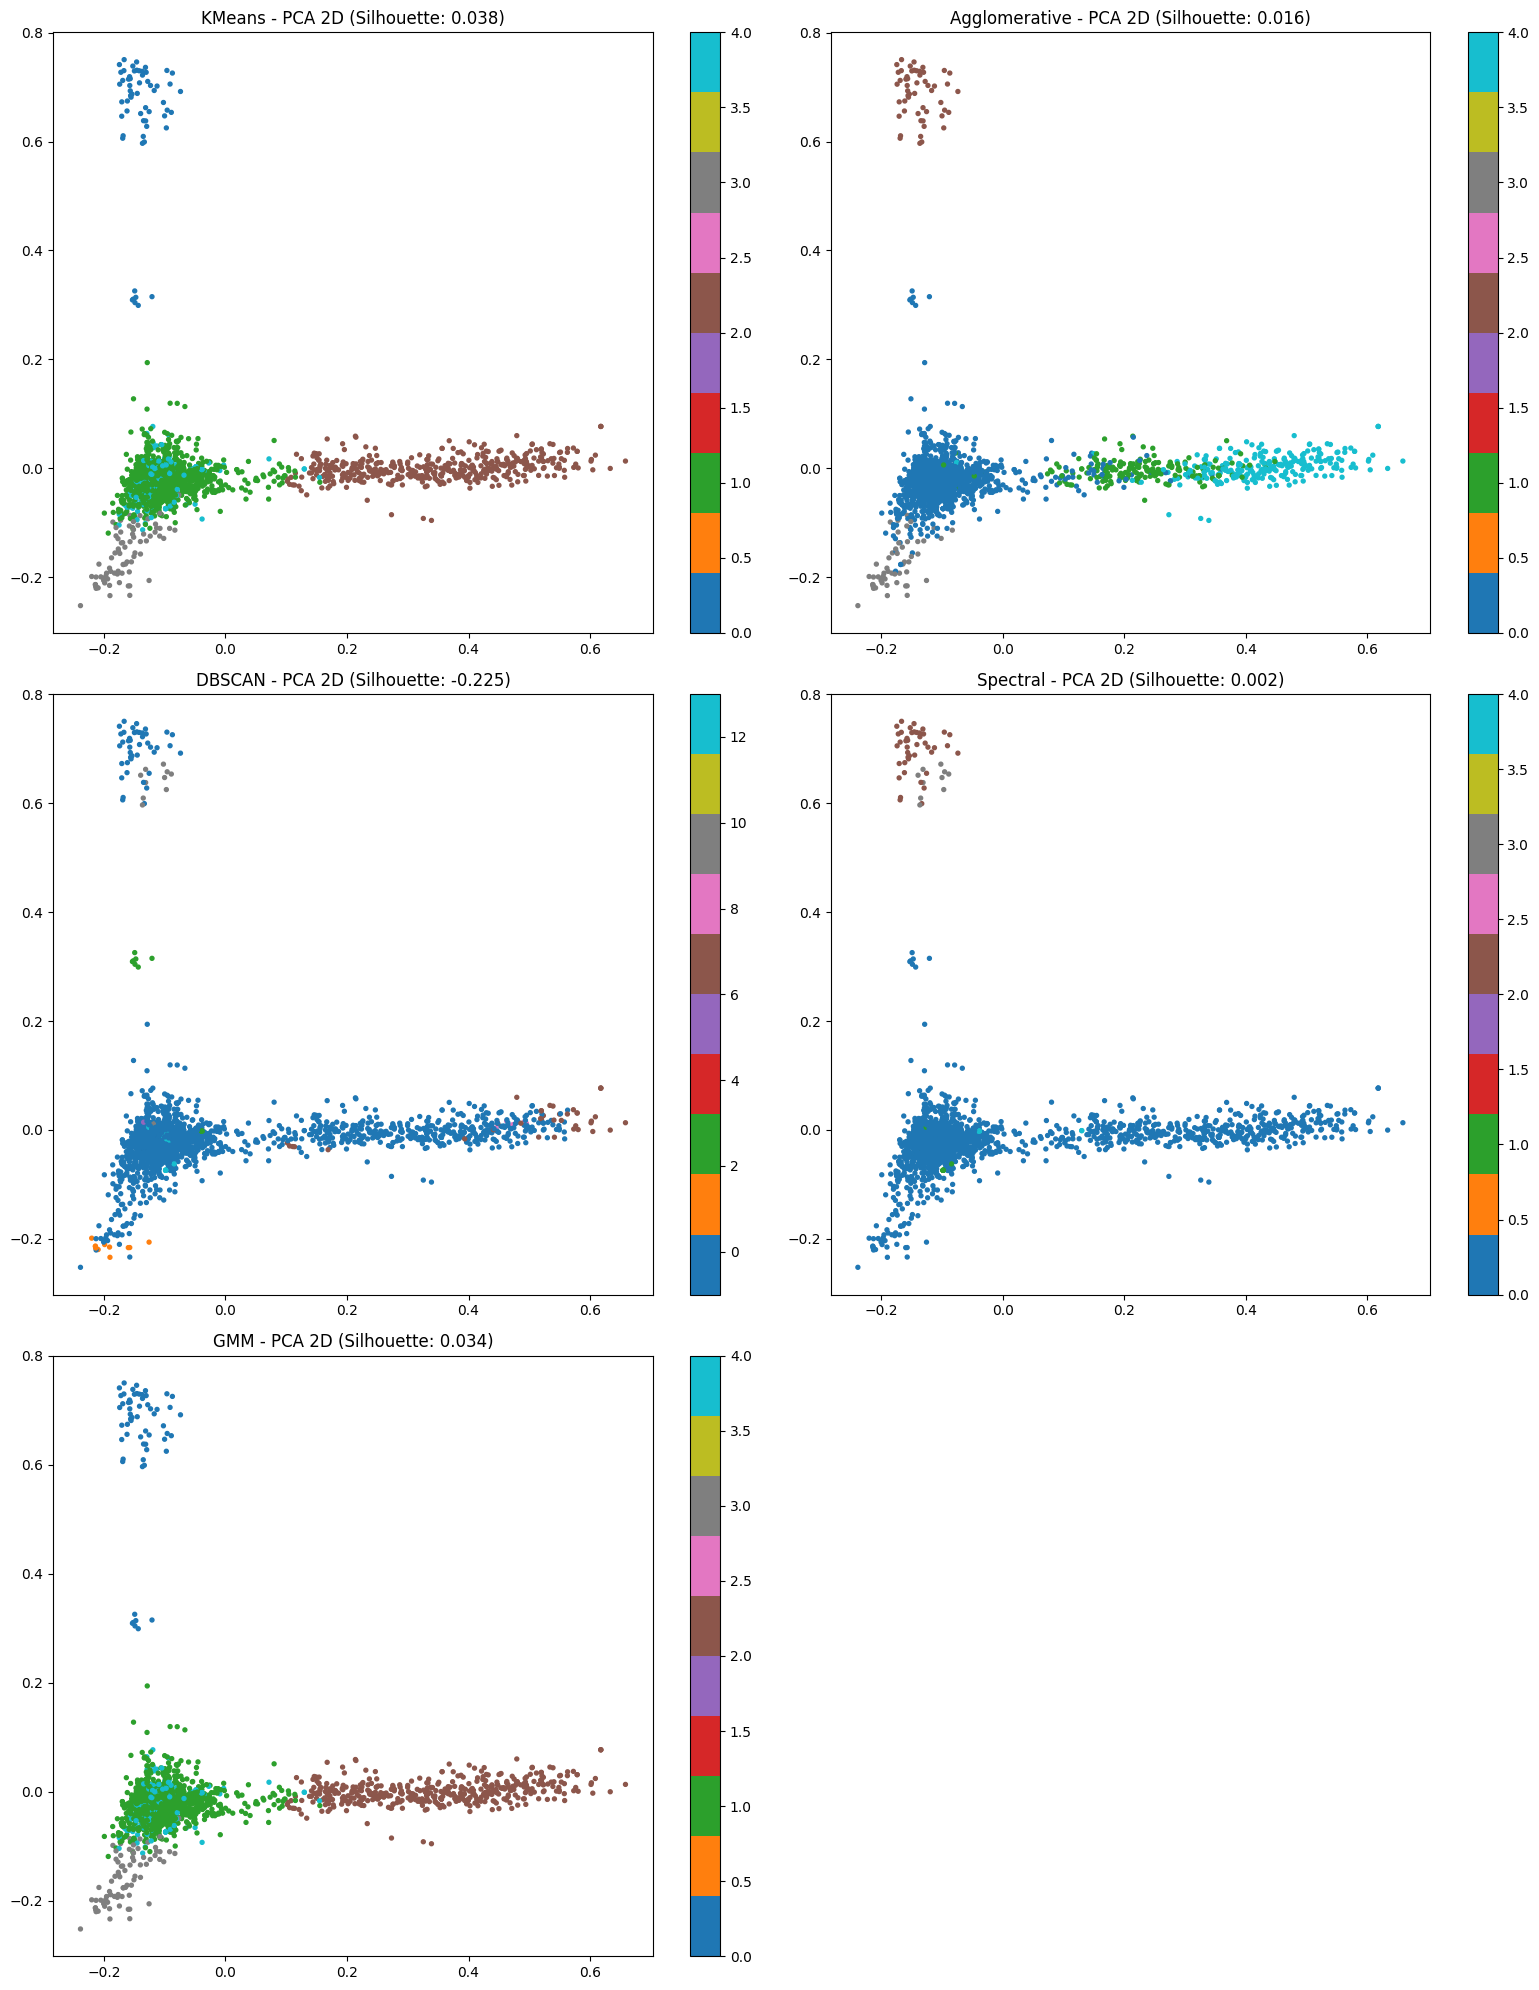


=== Evaluasi Model Clustering ===
           Model  Silhouette Score
0         KMeans          0.037945
4            GMM          0.033690
1  Agglomerative          0.015698
3       Spectral          0.001789
2         DBSCAN         -0.225115

🏆 Model Terbaik: **KMeans** dengan Silhouette Score = 0.038


In [31]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# -----------------------------
# 1. Clustering Models List
# -----------------------------
models = {
    "KMeans": KMeans(n_clusters=5, random_state=42),
    "Agglomerative": AgglomerativeClustering(n_clusters=5),
    "DBSCAN": DBSCAN(eps=0.8, min_samples=5),
    "Spectral": SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42),
    "GMM": GaussianMixture(n_components=5, random_state=42)
}
X = X_tfidf.toarray()

# -----------------------------
# 2. Clustering, Visualize, Evaluate
# -----------------------------
results = []

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(16, 20))
plot_idx = 1

for name, model in models.items():

    # Fit model
    if name == "GMM":
        clusters = model.fit_predict(X)
    else:
        clusters = model.fit_predict(X)

    df[f"cluster_{name}"] = clusters

    # Hitung silhouette score (DBSCAN kadang semua -1)
    try:
        score = silhouette_score(X, clusters)
    except:
        score = -1

    results.append((name, score))

    # -----------------------------
    # Plot Visualisasi PCA 2D untuk setiap model
    # -----------------------------
    plt.subplot(3, 2, plot_idx)
    plt.scatter(X_2d[:,0], X_2d[:,1], c=clusters, cmap="tab10", s=8)
    plt.title(f"{name} - PCA 2D (Silhouette: {score:.3f})")
    plt.colorbar()
    plot_idx += 1

plt.tight_layout()
plt.show()

# -----------------------------
# 3. Menampilkan Hasil Evaluasi
# -----------------------------
eval_df = pd.DataFrame(results, columns=["Model", "Silhouette Score"])
print("\n=== Evaluasi Model Clustering ===")
print(eval_df.sort_values("Silhouette Score", ascending=False))

best_model_name = eval_df.sort_values("Silhouette Score", ascending=False).iloc[0, 0]
best_score = eval_df.sort_values("Silhouette Score", ascending=False).iloc[0, 1]

print(f"\n🏆 Model Terbaik: **{best_model_name}** dengan Silhouette Score = {best_score:.3f}")


In [32]:
import re
from collections import Counter

def extract_hashtags(text):
    return re.findall(r"#(\w+)", text)

all_hashtags = sum(df[text_col].apply(extract_hashtags), [])

Counter(all_hashtags).most_common(20)


[('KUHAP', 37),
 ('RUUKUHAP', 26),
 ('SemuaBisaKena', 21),
 ('Polhuk', 12),
 ('AdadiKompas', 12),
 ('DPR', 10),
 ('PenegakanHukum', 9),
 ('ReformasiHukum', 8),
 ('RKUHAP', 8),
 ('kuhap', 8),
 ('KementerianHukum', 7),
 ('LayananHukumMakinMudah', 7),
 ('UUKuhap', 7),
 ('BHPSemarang', 6),
 ('KUHP', 6),
 ('DukungRKUHAP', 6),
 ('HukumPidana', 5),
 ('LanjutkanMBG', 5),
 ('beritaterkini', 5),
 ('AdiliJokowiRajaNgibul', 5)]

# Sentiment Analysist (Baseline)

## Pre-processing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import re

# =====================================================
# 1. FUNGSI SENTIMEN
# =====================================================
def get_sentiment_label(text):
    try:
        polarity = TextBlob(text).sentiment.polarity
        if polarity > 0.1:
            return "positive"
        elif polarity < -0.1:
            return "negative"
        else:
            return "neutral"
    except:
        return "neutral"

df["sentiment"] = df["full_text"].astype(str).apply(get_sentiment_label)

print("Distribusi Sentimen:")
print(df["sentiment"].value_counts())


Distribusi Sentimen:
sentiment
neutral     1863
positive      98
negative      39
Name: count, dtype: int64


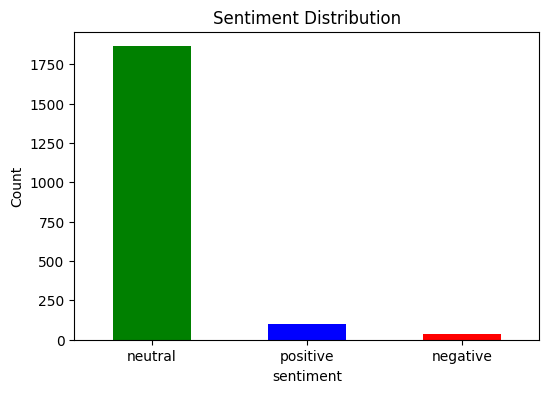

In [34]:
plt.figure(figsize=(6,4))
df["sentiment"].value_counts().plot(kind="bar", color=["green", "blue", "red"])
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [35]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

sastrawi_sw = set(StopWordRemoverFactory().get_stop_words())
nltk_sw = set(stopwords.words("indonesian"))
wc_sw = set(WordCloud().stopwords)

full_sw = sastrawi_sw.union(nltk_sw).union(wc_sw)

def clean_text_wc(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    tokens = [w for w in text.split() if w not in full_sw and len(w) > 2]
    return " ".join(tokens)

df["clean"] = df["full_text"].astype(str).apply(clean_text_wc)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


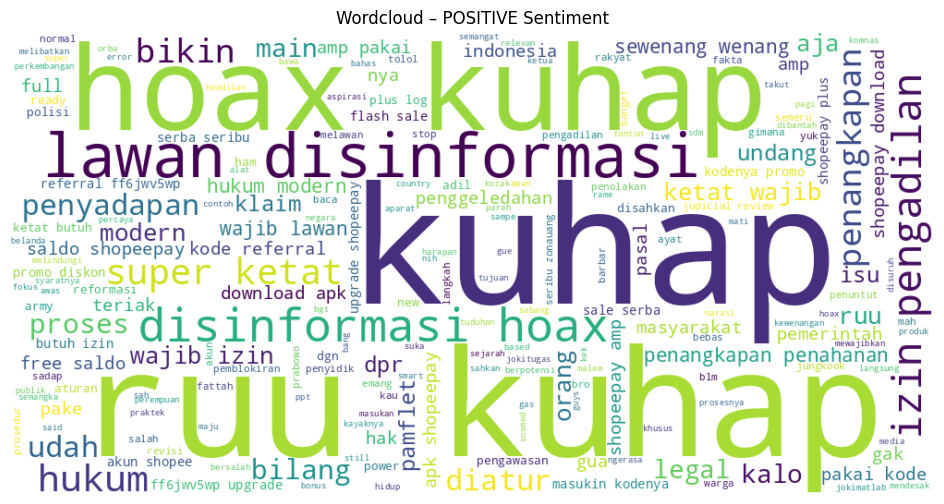

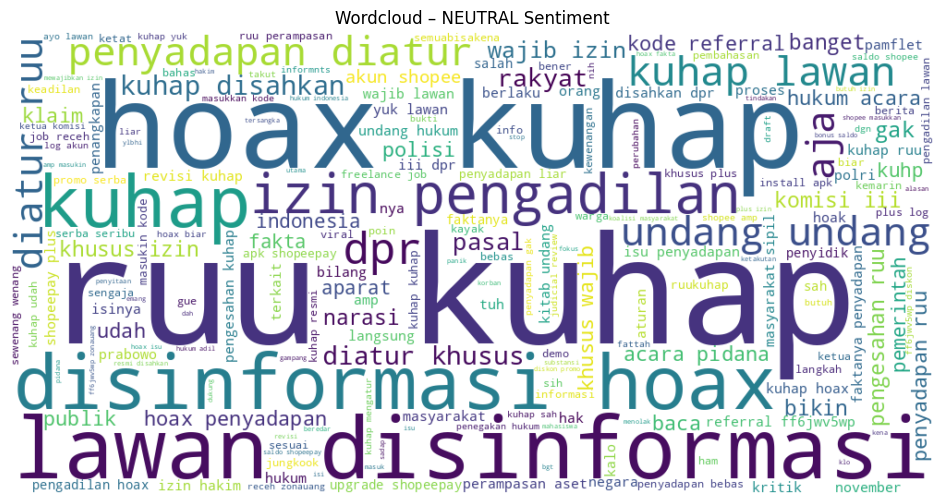

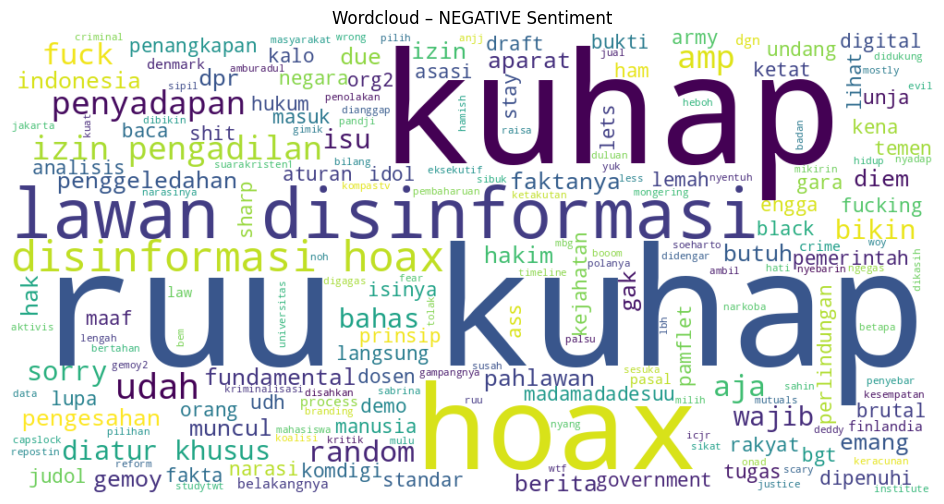

In [36]:
sentiments = ["positive", "neutral", "negative"]

for s in sentiments:
    subset = " ".join(df[df["sentiment"] == s]["clean"])
    wc = WordCloud(width=1000, height=500, background_color="white").generate(subset)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud – {s.upper()} Sentiment")
    plt.show()


In [37]:
def get_top_words(series, top_n=20):
    words = " ".join(series).split()
    counter = Counter(words)
    return counter.most_common(top_n)

for s in sentiments:
    print(f"\n=== TOP WORDS: {s.upper()} ===")
    top_words = get_top_words(df[df["sentiment"] == s]["clean"])
    for w, f in top_words:
        print(f"{w}: {f}")



=== TOP WORDS: POSITIVE ===
kuhap: 124
hoax: 54
ruu: 53
lawan: 26
disinformasi: 26
izin: 26
pengadilan: 23
hukum: 22
penangkapan: 19
super: 17
ketat: 16
shopeepay: 15
amp: 15
wajib: 15
modern: 13
bikin: 13
udah: 10
pakai: 10
diatur: 10
penyadapan: 10

=== TOP WORDS: NEUTRAL ===
kuhap: 2226
ruu: 1033
hoax: 956
disinformasi: 446
lawan: 439
penyadapan: 429
dpr: 309
izin: 295
hukum: 286
pengadilan: 248
diatur: 238
undang: 228
khusus: 202
disahkan: 158
pasal: 156
wajib: 149
pengesahan: 130
pidana: 126
amp: 123
masyarakat: 114

=== TOP WORDS: NEGATIVE ===
kuhap: 53
ruu: 29
hoax: 24
disinformasi: 12
lawan: 11
izin: 9
udah: 7
penyadapan: 6
pengadilan: 6
amp: 6
aja: 5
random: 5
fuck: 5
diatur: 4
khusus: 4
wajib: 4
isu: 4
bikin: 4
sorry: 4
bahas: 4



=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.86      0.93      0.90       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



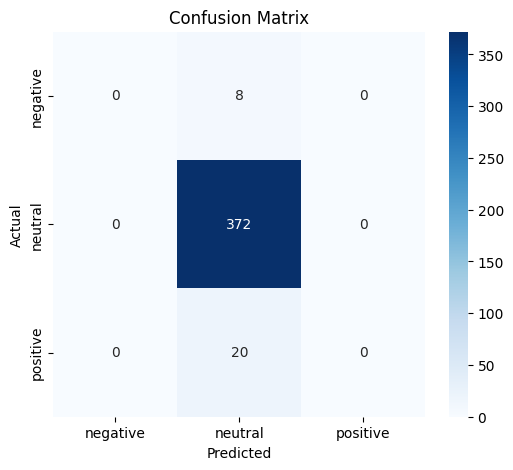

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------
# 1. PERSIAPAN DATA
# -------------------------------------

X = df["full_text"].astype(str)
y = df["sentiment"]

# Split data (80 & 20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

# -------------------------------------
# 2. TRAIN MODEL LOGISTIC REGRESSION
# -------------------------------------
model = LogisticRegression(max_iter=300)
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# -------------------------------------
# 3. HASIL EVALUASI
# -------------------------------------
print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)

print("\n=== NAIVE BAYES REPORT ===")
print(classification_report(y_test, nb_pred))



=== NAIVE BAYES REPORT ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.86      0.93      0.90       400



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/tmp/ipython-input-1707286404.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




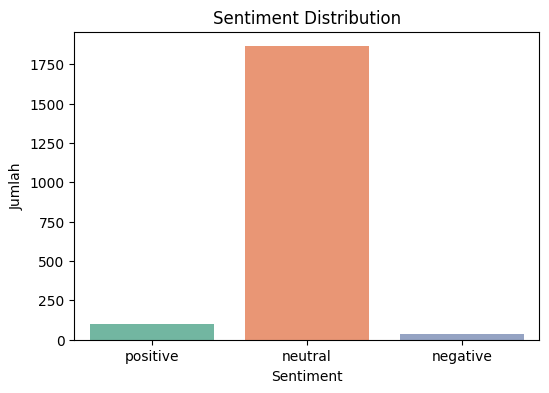

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Sentiment Distribution")
plt.ylabel("Jumlah")
plt.xlabel("Sentiment")
plt.show()


In [41]:
df.head()

Unnamed: 0                created_at  favorite_count  \
0  1.990000e+22 2025-11-19 00:42:26+00:00               1   
1  1.990000e+23 2025-11-19 00:43:10+00:00               0   
2  1.990000e+23 2025-11-19 00:43:10+00:00              27   
3  1.990000e+23 2025-11-19 00:44:13+00:00               0   
4  1.990000e+23 2025-11-19 00:50:42+00:00               0   

                                           full_text        id_str  \
0  @Ajierz @jatamnas banyak yg bilang praktekå_ y...  1.990000e+18   
1  @prabowo Izin menolak ruu kuhap isinya terlalu...  1.990000e+18   
2  @fluoxetan Zionis selalu geser gawang wkwkwkwk...  1.990000e+18   
3  @DPR_RI Izin menolak ruu kuhap isinya terlalu ...  1.990000e+18   
4  RUU KUHAP ini bikin makin percaya sama hukum g...  1.990000e+18   

                                         image_url in_reply_to_screen_name  \
0                                              NaN                  Ajierz   
1                                              NaN                 prabowo   
2  https://pbs.twimg.com/media/G6FAltNbMAUN0Sp.jpg               fluoxetan   
3                                              NaN                  DPR_RI   
4  https://pbs.twimg.com/media/G6FCpY-bMAEMgjO.jpg                     NaN   

  lang  location  quote_count  ...                      date  \
0   in       NaN            0  ... 2025-11-19 00:00:00+00:00   
1   in       NaN            0  ... 2025-11-19 00:00:00+00:00   
2   in       NaN            1  ... 2025-11-19 00:00:00+00:00   
3   in       NaN            0  ... 2025-11-19 00:00:00+00:00   
4   in       NaN            0  ... 2025-11-19 00:00:00+00:00   

                                          clean_text  \
0  banyak yg bilang praktek yg ada di ruu kuhap i...   
1     izin menolak ruu kuhap isinya terlalu mengatur   
2  zionis selalu geser gawang wkwkwkwk sok bahas ...   
3     izin menolak ruu kuhap isinya terlalu mengatur   
4  ruu kuhap ini bikin makin percaya sama hukum g...   

                                clean_text_stopwords  cluster_KMeans  \
0  bilang praktek ruu kuhap sebenernya udah dilak...               1   
1             izin menolak ruu kuhap isinya mengatur               4   
2  zionis geser gawang wkwkwkwk sok bahas ruu kuh...               4   
3             izin menolak ruu kuhap isinya mengatur               4   
4  ruu kuhap bikin percaya hukum gak korban revis...               1   

   cluster_Agglomerative cluster_DBSCAN cluster_Spectral cluster_GMM  \
0                      0             -1                0           1   
1                      0             -1                0           4   
2                      0             -1                0           4   
3                      0             -1                0           4   
4                      0             -1                0           1   

   sentiment                                              clean  
0   positive  ajierz jatamnas bilang praktek ruu kuhap seben...  
1    neutral     prabowo izin menolak ruu kuhap isinya mengatur  
2    neutral  fluoxetan zionis geser gawang wkwkwkwk sok bah...  
3    neutral         dpr izin menolak ruu kuhap isinya mengatur  
4    neutral  ruu kuhap bikin percaya hukum gak korban revis...  

[5 rows x 25 columns]

In [42]:
df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
df["month"] = df["created_at"].dt.to_period("M")


/tmp/ipython-input-3872883339.py:2: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



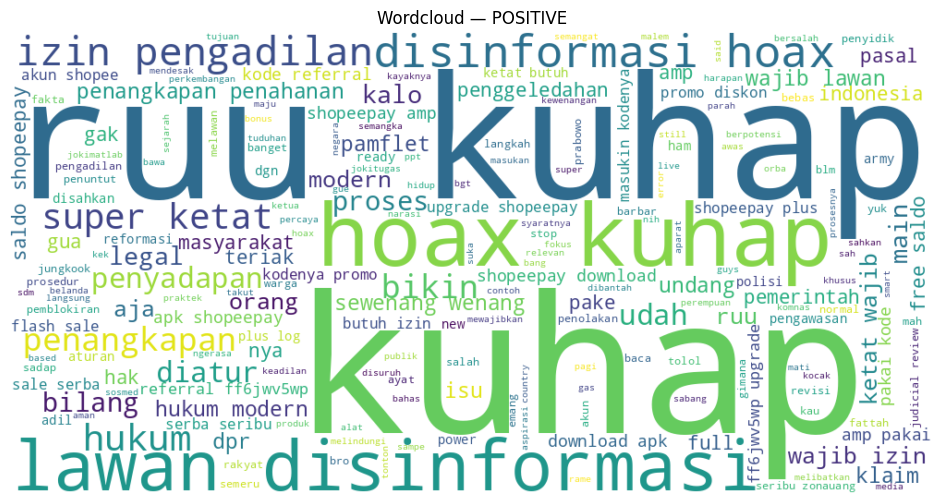

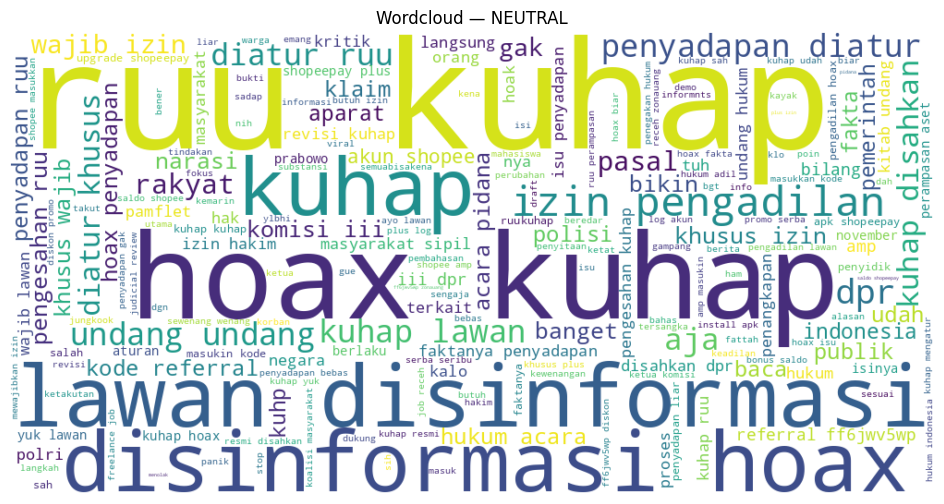

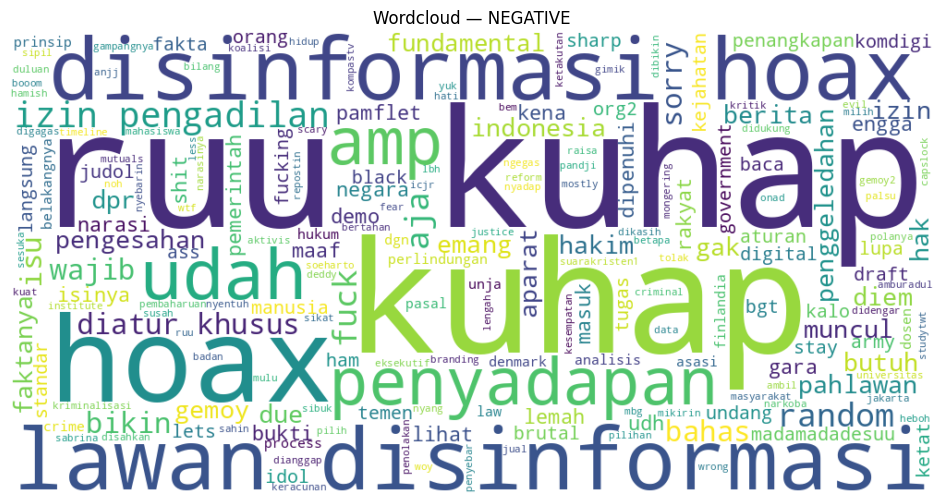

In [43]:
from wordcloud import WordCloud

for s in ["positive", "neutral", "negative"]:
    subset = " ".join(df[df["sentiment"] == s]["clean"])
    if len(subset) == 0:
        continue

    wc = WordCloud(width=1000, height=500, background_color="white").generate(subset)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Wordcloud — {s.upper()}")
    plt.show()



=== TOP WORDS: POSITIVE ===


/tmp/ipython-input-1483948629.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




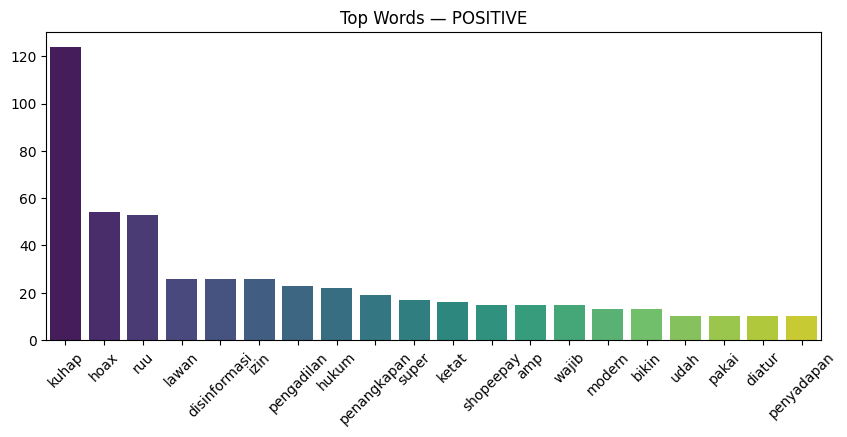


=== TOP WORDS: NEUTRAL ===


/tmp/ipython-input-1483948629.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




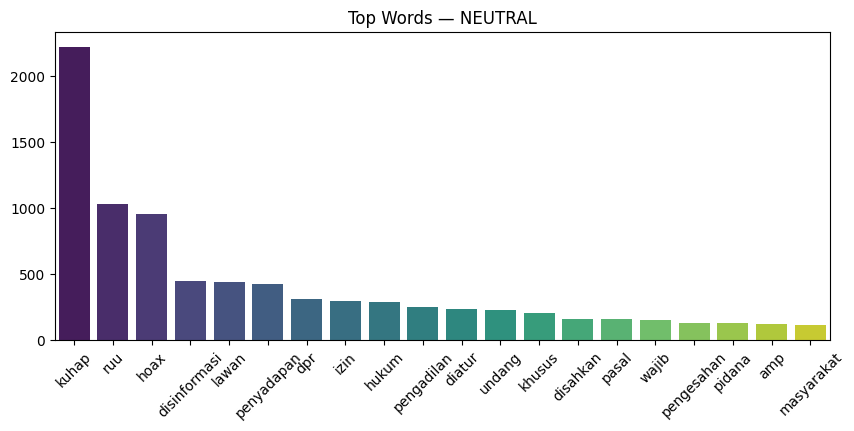


=== TOP WORDS: NEGATIVE ===


/tmp/ipython-input-1483948629.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




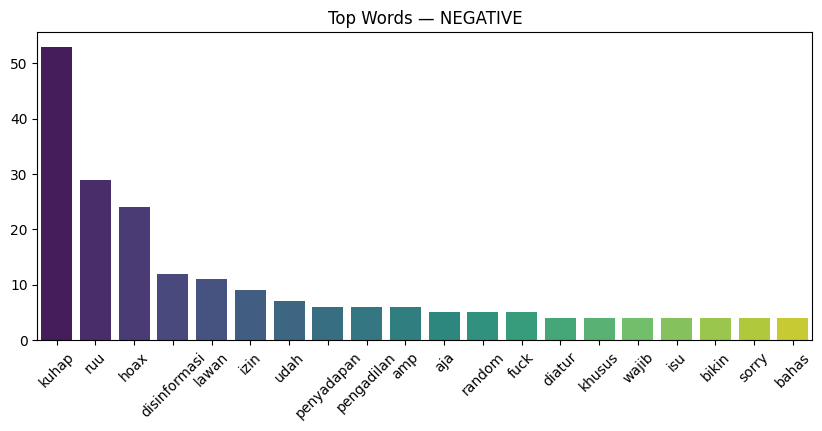

In [ ]:
from collections import Counter

def get_top_words(text_series, n=20):
    words = " ".join(text_series).split()
    counter = Counter(words)
    return counter.most_common(n)

for s in ["positive", "neutral", "negative"]:
    print(f"\n=== TOP WORDS: {s.upper()} ===")
    top_words = get_top_words(df[df["sentiment"] == s]["clean"])

    # Plot
    words, freq = zip(*top_words)
    plt.figure(figsize=(10,4))
    sns.barplot(x=list(words), y=list(freq), palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Top Words — {s.upper()}")
    plt.show()


## Social Network Analysist

### 1. User Mention Network

In [44]:
!pip install pyvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00


In [50]:
import pandas as pd
import re
import networkx as nx
from pyvis.network import Network

# =========================================================
# 1. Load Data Mentah
# =========================================================
data = pd.read_csv("/content/data_kuhap.csv", encoding='latin1', sep=';')

text_col = "full_text"

author_col = "user_id_str"


# =========================================================
# 2. Ekstraksi Mention dari full_text (data mentah)
# =========================================================
def extract_mentions(text):
    if pd.isna(text):
        return []
    mentions = re.findall(r'@[ŷ_]+', text)
    return [m[1:] for m in mentions]

data["mentions"] = data[text_col].apply(extract_mentions)


# =========================================================
# 3. Membangun User Mention Graph
# =========================================================
G = nx.DiGraph()

for _, row in data.iterrows():
    author = str(row[author_col])  # Convert author ID to string
    mentions = row["mentions"]

    if pd.isna(author):
        continue
    G.add_node(author)
    for mentioned_user in mentions:
        mentioned_user_str = str(mentioned_user) # Convert mentioned user ID to string
        if mentioned_user_str.strip() == "":
            continue
        G.add_node(mentioned_user_str)
        G.add_edge(author, mentioned_user_str)


# =========================================================
# 4. Statistik Jaringan
# =========================================================
print("Total nodes :", G.number_of_nodes())
print("Total edges :", G.number_of_edges())

# Top 10 users yang paling sering disebut (in-degree)
top_mentioned = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 most mentioned users:")
for user, deg in top_mentioned:
    print(f"{user} : {deg}")


# =========================================================
# 5. Visualisasi Interaktif dengan PyVis
# =========================================================
net = Network(
    notebook=False,
    directed=True,
    height="700px",
    width="100%",
    bgcolor="#ffffff",
    font_color="black"
)

net.barnes_hut()

net.from_nx(G)

output_path = "user_mention_network.html"
net.save_graph(output_path)

print(f"\n\u2713 Visualisasi berhasil dibuat: {output_path}")
print("\u2713 Buka file HTML tersebut di browser untuk melihat network interaktif.")

Total nodes : 452
Total edges : 5

Top 10 most mentioned users:
_ : 5
1.1e+18 : 0
1.78e+18 : 0
2310000000.0 : 0
1.6e+18 : 0
1.61e+18 : 0
1.8e+18 : 0
181000000.0 : 0
1.72e+18 : 0
1.92e+18 : 0

✓ Visualisasi berhasil dibuat: user_mention_network.html
✓ Buka file HTML tersebut di browser untuk melihat network interaktif.


### 2. Hastag Co-occurrence Network

In [52]:
import pandas as pd
import re
import itertools
import networkx as nx
from pyvis.network import Network

# =========================================================
# 1. Load Data Mentah
# =========================================================

text_col = "full_text"

# =========================================================
# 2. Ekstraksi Hashtag dari Teks Mentah
# =========================================================
def extract_hashtags(text):
    if pd.isna(text):
        return []
    hashtags = re.findall(r'#\w+', text)
    hashtags = [h[1:].lower() for h in hashtags]
    return hashtags

data["hashtags"] = data[text_col].apply(extract_hashtags)

# =========================================================
# 3. Bangun Graph Co-occurrence
# =========================================================
G = nx.Graph()

for _, row in data.iterrows():
    tags = row["hashtags"]

    if len(tags) < 2:
        continue

    tag_pairs = list(itertools.combinations(tags, 2))

    for t1, t2 in tag_pairs:
        if t1 == "" or t2 == "":
            continue

        G.add_node(t1)
        G.add_node(t2)

        if G.has_edge(t1, t2):
            G[t1][t2]['weight'] += 1
        else:
            G.add_edge(t1, t2, weight=1)


# =========================================================
# 4. Statistik Jaringan
# =========================================================
print("Total hashtag nodes :", G.number_of_nodes())
print("Total co-occurrence edges:", G.number_of_edges())

tag_freq = data["hashtags"].explode().value_counts().head(15)
print("\nTop 15 Most Frequent Hashtags:")
print(tag_freq)

top_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:15]
print("\nTop 15 Strongest Co-occurrence:")
for u, v, w in top_edges:
    print(f"{u} - {v}: {w['weight']}")

# =========================================================
# 5. Visualisasi Interaktif dengan PyVis
# =========================================================
net = Network(
    notebook=False,
    height="700px",
    width="100%",
    bgcolor="#ffffff",
    font_color="black"
)

net.barnes_hut()

freq_dict = data["hashtags"].explode().value_counts().to_dict()

for node in G.nodes():
    net.add_node(
        node,
        title=f"{node} ({freq_dict.get(node, 1)} occurrences)",
        value=freq_dict.get(node, 1)
    )

for u, v, w in G.edges(data=True):
    net.add_edge(
        u,
        v,
        value=w["weight"],
        title=f"Co-occurrence weight: {w['weight']}"
    )

output_path = "hashtag_cooccurrence_network.html"
net.save_graph(output_path)

print(f"\n✓ Hashtag Co-occurrence Network berhasil dibuat!")
print(f"✓ File tersimpan: {output_path}")
print("✓ Silakan buka file HTML tersebut di browser.")


Total hashtag nodes : 233
Total co-occurrence edges: 948

Top 15 Most Frequent Hashtags:
hashtags
kuhap                     45
ruukuhap                  29
semuabisakena             23
adadikompas               12
polhuk                    12
dpr                       11
penegakanhukum             9
kuhp                       8
reformasihukum             8
rkuhap                     8
uukuhap                    7
layananhukummakinmudah     7
kementerianhukum           7
hukum                      7
beritaterkini              6
Name: count, dtype: int64

Top 15 Strongest Co-occurrence:
polhuk - adadikompas: 12
kuhap - kuhp: 8
kementerianhukum - layananhukummakinmudah: 7
kuhap - ruukuhap: 6
kuhap - dpr: 6
kuhap - hukum: 6
kementerianhukum - bhpsemarang: 6
layananhukummakinmudah - bhpsemarang: 6
rkuhap - dukungrkuhap: 6
kuhap - semuabisakena: 4
kuhap - viral: 4
ruukuhap - reformasihukum: 4
dpr - hukum: 4
dpr - kuhp: 4
kuhap - hukumpidana: 3

✓ Hashtag Co-occurrence Network berhasil dibuat

### 3. Community Detection (Louvain & Greedy Modularity)

In [53]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import community as community_louvain
import pandas as pd
import re

def extract_mentions(text):
    if pd.isna(text):
        return []
    return re.findall(r'@(\w+)', text)

data["mentions"] = data["full_text"].apply(extract_mentions)

G_mention = nx.Graph()

for idx, row in data.iterrows():
    mentions = row["mentions"]

    if len(mentions) < 2:
        continue

    for a, b in combinations(mentions, 2):
        if G_mention.has_edge(a, b):
            G_mention[a][b]["weight"] += 1
        else:
            G_mention.add_edge(a, b, weight=1)


In [54]:
print("Jumlah node :", len(G_mention.nodes()))
print("Jumlah edge :", len(G_mention.edges()))


Jumlah node : 293
Jumlah edge : 1826


In [55]:
!pip install --upgrade python-louvain

import sys
if 'community' in sys.modules:
    print("Menghapus modul 'community' dari sys.modules...")
    del sys.modules['community']

from community import community_louvain
import matplotlib.pyplot as plt

partition = community_louvain.best_partition(G_mention)
nx.set_node_attributes(G_mention, partition, "community")

print("Jumlah komunitas (Louvain):", len(set(partition.values())))

Menghapus modul 'community' dari sys.modules...
Jumlah komunitas (Louvain): 47


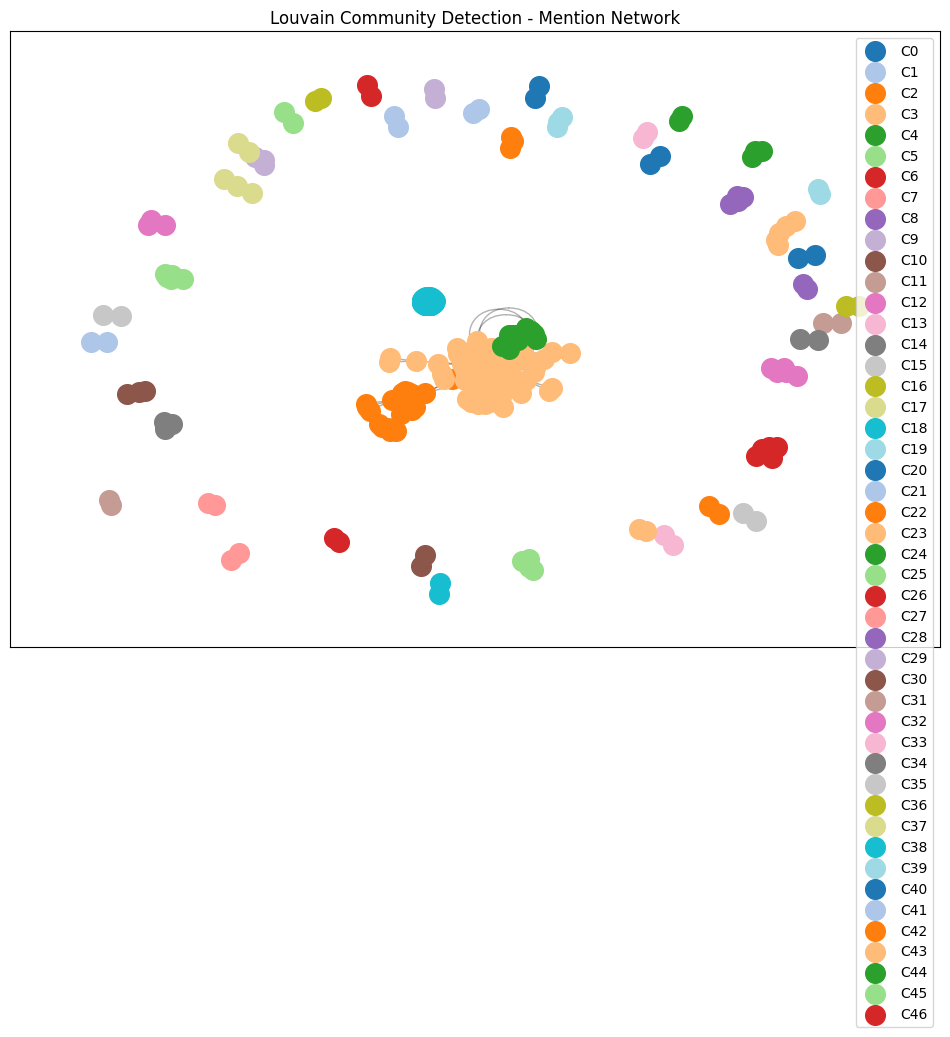

In [56]:
from community import community_louvain
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_mention, seed=42)
color_map = plt.cm.tab20

plt.figure(figsize=(12, 8))

partition_g_mention = community_louvain.best_partition(G_mention)

for comm_id in set(partition_g_mention.values()):
    nodes = [node for node, c in partition_g_mention.items() if c == comm_id]
    nx.draw_networkx_nodes(G_mention, pos, nodelist=nodes,
                           node_color=[color_map(comm_id % 20)],
                           node_size=200,
                           label=f"C{comm_id}")

nx.draw_networkx_edges(G_mention, pos, alpha=0.3)

plt.title("Louvain Community Detection - Mention Network")
plt.legend()
plt.show()

In [57]:
import networkx as nx
import pandas as pd

G = G_mention

# 1. Degree Centrality
deg_cent = nx.degree_centrality(G)

# 2. Betweenness Centrality
btw_cent = nx.betweenness_centrality(G, normalized=True)

# 3. Eigenvector Centrality
try:
    eig_cent = nx.eigenvector_centrality(G, max_iter=1000)
except nx.PowerIterationFailedConvergence:
    eig_cent = {}

# 4. PageRank
pr_cent = nx.pagerank(G)

centrality_df = pd.DataFrame({
    "node": list(G.nodes()),
    "degree_centrality": [deg_cent.get(n,0) for n in G.nodes()],
    "betweenness": [btw_cent.get(n,0) for n in G.nodes()],
    "eigenvector": [eig_cent.get(n,0) for n in G.nodes()],
    "pagerank": [pr_cent.get(n,0) for n in G.nodes()],
    "community": [G.nodes[n].get("community", -1) for n in G.nodes()]
})

centrality_df = centrality_df.sort_values("pagerank", ascending=False)
centrality_df.head()


node  degree_centrality  betweenness   eigenvector  pagerank  \
39          prabowo           0.109589     0.089787  6.707878e-07  0.014684   
71  puanmaharani_ri           0.089041     0.023387  9.137516e-07  0.014027   
70           DPR_RI           0.068493     0.026249  4.805554e-07  0.013552   
61        Informnts           0.047945     0.028724  1.896539e-07  0.012901   
11            YLBHI           0.082192     0.070798  5.660599e-07  0.009533   

    community  
39          1  
71          1  
70          1  
61          1  
11          3

In [58]:
from pyvis.network import Network

net = Network(height="720px", width="100%", bgcolor="#111", font_color="white")

net.from_nx(G)

net.show_buttons(filter_=['physics'])
net.set_options("""
var options = {
  "nodes": {
    "shape": "dot",
    "scaling": { "min": 5, "max": 25 }
  },
  "edges": {
    "color": {"inherit": true},
    "smooth": false
  },
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -4000,
      "centralGravity": 0.3,
      "springLength": 100,
      "springConstant": 0.04
    },
    "minVelocity": 0.75
  }
}
""")

# Simpan ke HTML
net.save_graph("mention_network_interactive.html")


In [59]:
from textblob import TextBlob

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

data["sentiment"] = data["full_text"].apply(get_sentiment)


In [60]:
from collections import defaultdict

node_sentiment = defaultdict(list)

for idx, row in data.iterrows():
    sent = row["sentiment"]
    mentions = row["mentions"]

    for m in mentions:
        node_sentiment[m].append(sent)

# Rata-rata sentimen per node
node_sentiment_avg = {node: sum(vals)/len(vals) for node, vals in node_sentiment.items()}


In [61]:
nx.set_node_attributes(G, node_sentiment_avg, "sentiment")


In [62]:
com_sentiment = defaultdict(list)

for node in G.nodes():
    comm = G.nodes[node].get("community")
    sent = G.nodes[node].get("sentiment", 0)
    if comm != -1:
        com_sentiment[comm].append(sent)

community_sentiment_avg = {
    comm: sum(vals)/len(vals) for comm, vals in com_sentiment.items()
}

community_sentiment_avg


{0: 0.2,
 1: 0.015863483251200797,
 2: 0.009722222222222222,
 3: 0.0,
 4: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.2,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.15476190476190474,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: -0.19433333333333333,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.02500000000000001,
 30: 0.05185185185185185,
 31: 0.0,
 32: -0.0047619047619047615,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.3,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: -0.008333333333333333,
 44: 0.0,
 45: 0.0,
 46: -0.1,
 5: 0.0}

#### a. Composite Score Influencer

In [64]:
from sklearn.preprocessing import MinMaxScaler

cent_df = centrality_df.copy()

scaler = MinMaxScaler()
cent_df[["degree_centrality", "betweenness", "eigenvector", "pagerank"]] = scaler.fit_transform(
    cent_df[["degree_centrality", "betweenness", "eigenvector", "pagerank"]]
)

cent_df["influencer_score"] = (
    0.35 * cent_df["pagerank"] +
    0.30 * cent_df["eigenvector"] +
    0.20 * cent_df["degree_centrality"] +
    0.15 * cent_df["betweenness"]
)

influencer_rank = cent_df.sort_values("influencer_score", ascending=False)

influencer_rank.head(15)


node  degree_centrality  betweenness  eigenvector  pagerank  \
39           prabowo           0.645833          1.0     0.000005  1.000000   
226    toniwahyudi21           1.000000          0.0     1.000000  0.186691   
223   Enggang_Kaltim           1.000000          0.0     1.000000  0.186691   
234       dewimajid4           1.000000          0.0     1.000000  0.186691   
233       SuwandaBen           1.000000          0.0     1.000000  0.186691   
232  NegeriKorup4545           1.000000          0.0     1.000000  0.186691   
231          SR21881           1.000000          0.0     1.000000  0.186691   
230  W1lL_AngelRoses           1.000000          0.0     1.000000  0.186691   
229      abah_mumtaz           1.000000          0.0     1.000000  0.186691   
228     RusdiridwanS           1.000000          0.0     1.000000  0.186691   
240           xix0_3           1.000000          0.0     1.000000  0.186691   
241       naaooollll           1.000000          0.0     1.000000  0.186691   
242     Sandika_Noor           1.000000          0.0     1.000000  0.186691   
216         sampalle           1.000000          0.0     1.000000  0.186691   
215  Darmara02177184           1.000000          0.0     1.000000  0.186691   

     community  influencer_score  
39           1          0.629168  
226         38          0.565342  
223         38          0.565342  
234         38          0.565342  
233         38          0.565342  
232         38          0.565342  
231         38          0.565342  
230         38          0.565342  
229         38          0.565342  
228         38          0.565342  
240         38          0.565342  
241         38          0.565342  
242         38          0.565342  
216         38          0.565342  
215         38          0.565342

#### b. Filtering Network (Membersihkan Noise)

In [ ]:
degree_threshold = 1
nodes_to_remove = [n for n, d in G.degree() if d <= degree_threshold]

G_filtered = G.copy()
G_filtered.remove_nodes_from(nodes_to_remove)

print("Node awal:", len(G.nodes()))
print("Node setelah filter:", len(G_filtered.nodes()))

Node awal: 293
Node setelah filter: 193


#### c. SENTIMENT HEATMAP antar Komunitas

In [ ]:
import numpy as np

comm_sent = {}

for node in G.nodes():
    comm = G.nodes[node].get("community")
    sent = G.nodes[node].get("sentiment", 0)

    if comm not in comm_sent:
        comm_sent[comm] = []
    comm_sent[comm].append(sent)

comm_sentiment_mean = {c: np.mean(vals) for c, vals in comm_sent.items()}

comm_sentiment_mean


{0: np.float64(0.2),
 1: np.float64(0.01726007033248082),
 2: np.float64(-0.0025),
 4: np.float64(0.009722222222222222),
 5: np.float64(0.0),
 7: np.float64(0.0),
 8: np.float64(0.0),
 9: np.float64(0.2),
 10: np.float64(0.0),
 11: np.float64(0.0),
 12: np.float64(0.0),
 13: np.float64(0.15476190476190474),
 14: np.float64(0.0),
 15: np.float64(0.0),
 16: np.float64(0.0),
 17: np.float64(0.0),
 18: np.float64(0.0),
 19: np.float64(0.0),
 20: np.float64(0.0),
 21: np.float64(0.0),
 22: np.float64(0.0),
 23: np.float64(0.0),
 24: np.float64(-0.19433333333333333),
 25: np.float64(0.0),
 26: np.float64(0.0),
 27: np.float64(0.0),
 28: np.float64(0.0),
 29: np.float64(0.0),
 30: np.float64(0.02500000000000001),
 31: np.float64(0.05185185185185185),
 32: np.float64(0.0),
 33: np.float64(-0.0047619047619047615),
 34: np.float64(0.0),
 35: np.float64(0.0),
 36: np.float64(0.0),
 37: np.float64(0.0),
 38: np.float64(0.0),
 39: np.float64(0.0),
 40: np.float64(0.3),
 41: np.float64(0.0),
 42: np

### 4. Centrality Measures (Degree, Betweenness, Eigenvector)

In [ ]:
import pandas as pd
import re
import networkx as nx

text_col = "full_text"

# -----------------------------------------------------
# Extra: fungsi untuk ekstrak hashtag dari teks kotor
# -----------------------------------------------------
def extract_hashtags(text):
    if pd.isna(text):
        return []
    text = str(text)
    return re.findall(r"#\w+", text.lower())
data["hashtags"] = data[text_col].apply(extract_hashtags)

# -----------------------------------------------------
# Bangun network graph
# -----------------------------------------------------
G_hashtag = nx.Graph()

for tags in data["hashtags"]:
    if len(tags) > 1:
        for i in range(len(tags)):
            for j in range(i+1, len(tags)):
                t1, t2 = tags[i], tags[j]
                if G_hashtag.has_edge(t1, t2):
                    G_hashtag[t1][t2]["weight"] += 1
                else:
                    G_hashtag.add_edge(t1, t2, weight=1)

print("Jumlah node hashtag:", G_hashtag.number_of_nodes())
print("Jumlah edge hashtag:", G_hashtag.number_of_edges())


Jumlah node hashtag: 235
Jumlah edge hashtag: 952


In [ ]:
import pandas as pd
import networkx as nx

G = G_hashtag

degree_cent = nx.degree_centrality(G)
betweenness_cent = nx.betweenness_centrality(G, normalized=True)
eigenvector_cent = nx.eigenvector_centrality(G, max_iter=500)

df_cent = pd.DataFrame({
    "node": list(G.nodes()),
    "degree": [degree_cent[n] for n in G.nodes()],
    "betweenness": [betweenness_cent[n] for n in G.nodes()],
    "eigenvector": [eigenvector_cent[n] for n in G.nodes()]
})

df_cent.sort_values("degree", ascending=False, inplace=True)
df_cent.to_csv("centrality_measures.csv", index=False)

print(df_cent.head())


               node    degree  betweenness  eigenvector
3            #kuhap  0.427350     0.324355     0.376179
7         #ruukuhap  0.260684     0.119396     0.265878
29             #dpr  0.162393     0.031068     0.191918
19  #reformasihukum  0.153846     0.029879     0.198436
39     #hukumpidana  0.141026     0.015740     0.215764


In [ ]:
import plotly.express as px

top_degree = df_cent.sort_values("degree", ascending=False).head(20)
fig_deg = px.bar(
    top_degree,
    x="node",
    y="degree",
    title="Top 20 Degree Centrality",
    labels={"node":"Hashtag", "degree":"Degree Centrality"},
)
fig_deg.show()

top_bet = df_cent.sort_values("betweenness", ascending=False).head(20)
fig_bet = px.bar(
    top_bet,
    x="node",
    y="betweenness",
    title="Top 20 Betweenness Centrality",
)
fig_bet.show()

top_eig = df_cent.sort_values("eigenvector", ascending=False).head(20)
fig_eig = px.bar(
    top_eig,
    x="node",
    y="eigenvector",
    title="Top 20 Eigenvector Centrality",
)
fig_eig.show()


In [ ]:
import plotly.graph_objects as go
import networkx as nx

pos = nx.spring_layout(G_hashtag, seed=42)

node_x = [pos[node][0] for node in G_hashtag.nodes()]
node_y = [pos[node][1] for node in G_hashtag.nodes()]

node_size = [df_cent.set_index("node").loc[node]["degree"]*300 for node in G_hashtag.nodes()]
node_text = [node for node in G_hashtag.nodes()]

edge_x = []
edge_y = []
for e in G_hashtag.edges():
    x0, y0 = pos[e[0]]
    x1, y1 = pos[e[1]]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    text=node_text,
    textposition="top center",
    hoverinfo='text',
    marker=dict(
        size=node_size,
        sizemode="area",
        line_width=1
    )
)

fig_net = go.Figure(data=[edge_trace, node_trace])
fig_net.update_layout(
    title="Hashtag Co-occurrence Network (node size = degree centrality)",
    showlegend=False,
    width=900,
    height=720
)
fig_net.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_comp = df_cent.copy()

scaler = MinMaxScaler()
df_comp[["degree_n", "betweenness_n", "eigenvector_n"]] = scaler.fit_transform(
    df_comp[["degree", "betweenness", "eigenvector"]]
)

df_comp["composite_score"] = (
    0.4 * df_comp["degree_n"] +
    0.3 * df_comp["betweenness_n"] +
    0.3 * df_comp["eigenvector_n"]
)

df_comp.sort_values("composite_score", ascending=False, inplace=True)

print("=== Top Influencers Berdasarkan Composite Score ===")
print(df_comp.head(15))

df_comp.head(30).to_csv("top_influencers_composite.csv", index=False)


=== Top Influencers Berdasarkan Composite Score ===
               node    degree  betweenness  eigenvector  degree_n  \
3            #kuhap  0.427350     0.324355     0.376179  1.000000   
7         #ruukuhap  0.260684     0.119396     0.265878  0.606061   
29             #dpr  0.162393     0.031068     0.191918  0.373737   
19  #reformasihukum  0.153846     0.029879     0.198436  0.353535   
39     #hukumpidana  0.141026     0.015740     0.215764  0.323232   
32           #hukum  0.136752     0.020044     0.155499  0.313131   
38            #kuhp  0.132479     0.005928     0.164543  0.303030   
11           #dprri  0.111111     0.007975     0.163253  0.252525   
8     #undangundang  0.094017     0.003941     0.161614  0.212121   
24   #semuabisakena  0.064103     0.138490     0.038601  0.141414   
82   #beritaterkini  0.094017     0.075136     0.076214  0.212121   
47  #penegakanhukum  0.094017     0.010583     0.150602  0.212121   
42       #kuhapbaru  0.094017     0.003171     0.15

In [ ]:
from community import community_louvain

partition = community_louvain.best_partition(G_hashtag)

In [ ]:
from community import community_louvain

partition = community_louvain.best_partition(G_hashtag)

nx.set_node_attributes(G_hashtag, partition, "community")

num_com = len(set(partition.values()))
print("Jumlah komunitas ditemukan:", num_com)

Jumlah komunitas ditemukan: 25


In [ ]:
import matplotlib.cm as cm
import numpy as np

communities = set(partition.values())
color_map = cm.get_cmap("tab20", len(communities))

/tmp/ipython-input-3179742877.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [ ]:
import plotly.graph_objects as go

pos = nx.spring_layout(G_hashtag, seed=42)

edge_x = []
edge_y = []
for u, v in G_hashtag.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    mode="lines",
    line=dict(width=0.5, color="gray"),
    hoverinfo="none"
)

node_x = []
node_y = []
node_color = []
node_text = []

for node in G_hashtag.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_color.append(partition[node])
    node_text.append(f"{node} (community {partition[node]})")

fig = go.Figure()

fig.add_trace(edge_trace)

fig.add_trace(
    go.Scatter(
        x=node_x,
        y=node_y,
        mode="markers+text",
        text=[n for n in G_hashtag.nodes()],
        textposition="top center",
        hovertext=node_text,
        hoverinfo="text",
        marker=dict(
            size=12,
            color=node_color,
            colorscale="Viridis",
            showscale=True
        )
    )
)

fig.update_layout(
    title="Hashtag Network dengan Warna Berdasarkan Komunitas (Louvain)",
    width=900,
    height=720
)

fig.show()


### 5. Kombinasi User Mention + Hashtag dalam satu visu multilayer

In [ ]:
import pandas as pd
import networkx as nx
import re
from itertools import combinations
import plotly.graph_objects as go

# ==================================================================
# 1. LOAD DATA RAW
# ==================================================================

if "full_text" not in data.columns:
    raise ValueError("Kolom 'full_text' tidak ditemukan dalam dataset!")

# ==================================================================
# 2. FUNGSI EKSTRAK MENTION & HASHTAG DARI FULL_TEXT RAW
# ==================================================================
def extract_mentions(text):
    return re.findall(r"@(\w+)", str(text))

def extract_hashtags(text):
    return re.findall(r"#(\w+)", str(text))

data["mentions_extracted"] = data["full_text"].apply(extract_mentions)
data["hashtags_extracted"] = data["full_text"].apply(extract_hashtags)

# ==================================================================
# 3. BUILD MULTILAYER GRAPH
# ==================================================================
G_multi = nx.Graph()

# ------------------------------
# LAYER 1: USER MENTION NETWORK
# ------------------------------
for _, row in data.iterrows():
    author = str(row["screen_name"]) if "screen_name" in data.columns else None
    if author is None:
        continue

    mentions = row["mentions_extracted"]
    for m in mentions:
        if m.lower() == author.lower():
            continue
        G_multi.add_node(author, layer="user")
        G_multi.add_node(m, layer="user")
        G_multi.add_edge(author, m, type="mention")

# ------------------------------
# LAYER 2: HASHTAG NETWORK
# ------------------------------
for hashtags in data["hashtags_extracted"]:
    hashtags = list(set(hashtags))
    if len(hashtags) > 1:
        for h1, h2 in combinations(hashtags, 2):
            G_multi.add_node(h1, layer="hashtag")
            G_multi.add_node(h2, layer="hashtag")
            G_multi.add_edge(h1, h2, type="hashtag")

# ------------------------------
# CROSS-LAYER EDGES: USER ↔ HASHTAG
# ------------------------------
for _, row in data.iterrows():
    author = str(row["screen_name"]) if "screen_name" in data.columns else None
    if author is None:
        continue

    hashtags = row["hashtags_extracted"]
    for h in hashtags:
        G_multi.add_node(author, layer="user")
        G_multi.add_node(h, layer="hashtag")
        G_multi.add_edge(author, h, type="cross")

# ==================================================================
# 4. MULTILAYER VISUALIZATION WITH PLOTLY
# ==================================================================

pos = nx.spring_layout(G_multi, k=0.35, seed=42)

user_nodes = [n for n in G_multi.nodes if G_multi.nodes[n]["layer"] == "user"]
hashtag_nodes = [n for n in G_multi.nodes if G_multi.nodes[n]["layer"] == "hashtag"]

user_x = [pos[n][0] for n in user_nodes]
user_y = [pos[n][1] for n in user_nodes]

tag_x = [pos[n][0] for n in hashtag_nodes]
tag_y = [pos[n][1] for n in hashtag_nodes]

edge_x = []
edge_y = []
for u, v in G_multi.edges():
    x0, y0 = pos[u]
    x1, y1 = pos[v]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    mode='lines',
    line=dict(width=0.5),
    hoverinfo='none'
))

fig.add_trace(go.Scatter(
    x=user_x, y=user_y,
    mode='markers+text',
    text=user_nodes,
    textposition="top center",
    marker=dict(size=10, symbol="circle"),
    name="Users"
))

fig.add_trace(go.Scatter(
    x=tag_x, y=tag_y,
    mode='markers+text',
    text=hashtag_nodes,
    textposition="top center",
    marker=dict(size=10, symbol="square"),
    name="Hashtags"
))

fig.update_layout(
    title="Multilayer Network: User Mentions + Hashtags",
    showlegend=True,
    width=1100,
    height=800
)

fig.show()


In [ ]:
import plotly.express as px

top_degree = df_cent.sort_values("degree", ascending=False).head(20)
fig_deg = px.bar(
    top_degree,
    x="node",
    y="degree",
    title="Top 20 Degree Centrality",
    labels={"node":"Hashtag", "degree":"Degree Centrality"},
)
fig_deg.show()

top_bet = df_cent.sort_values("betweenness", ascending=False).head(20)
fig_bet = px.bar(
    top_bet,
    x="node",
    y="betweenness",
    title="Top 20 Betweenness Centrality",
    labels={"node":"Hashtag", "betweenness":"Betweenness Centrality"},
)
fig_bet.show()

top_eig = df_cent.sort_values("eigenvector", ascending=False).head(20)
fig_eig = px.bar(
    top_eig,
    x="node",
    y="eigenvector",
    title="Top 20 Eigenvector Centrality",
    labels={"node":"Hashtag", "eigenvector":"Eigenvector Centrality"},
)
fig_eig.show()

## Sentiment Analysis (Auto Label)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

new_models = {
    "LinearSVC": LinearSVC(random_state=42, dual=False),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "MLPClassifier": MLPClassifier(random_state=42, max_iter=500)
}

print("Initialized new sentiment classification models:")
for name, model in new_models.items():
    print(f"- {name}: {model}")

Initialized new sentiment classification models:
- LinearSVC: LinearSVC(dual=False, random_state=42)
- RandomForestClassifier: RandomForestClassifier(random_state=42)
- GradientBoostingClassifier: GradientBoostingClassifier(random_state=42)
- KNeighborsClassifier: KNeighborsClassifier()
- MLPClassifier: MLPClassifier(max_iter=500, random_state=42)



=== LOGISTIC REGRESSION EVALUATION ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.86      0.93      0.90       400



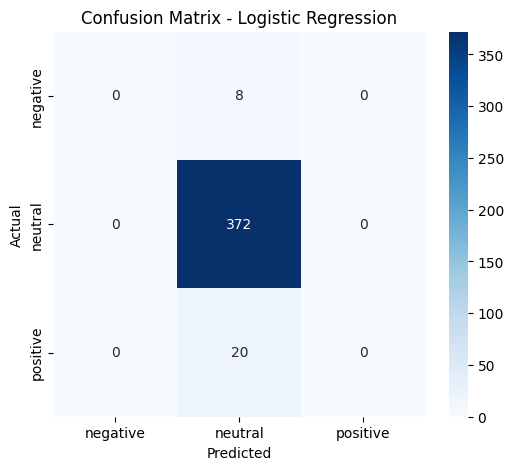


=== NAIVE BAYES EVALUATION ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.86      0.93      0.90       400



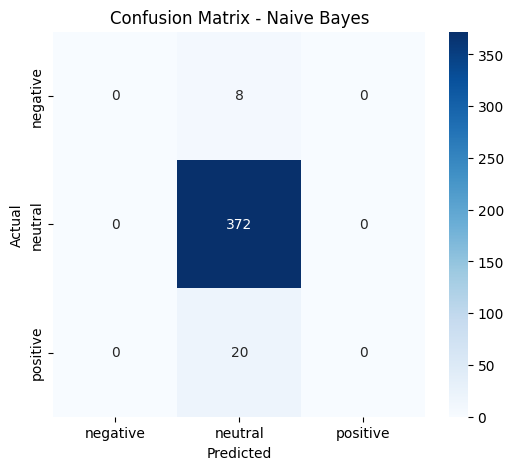

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

all_model_results = {}

class_labels = sorted(y_test.unique())
print("\n=== LOGISTIC REGRESSION EVALUATION ===")
report_lr = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
print(classification_report(y_test, y_pred, zero_division=0))

cm_lr = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

all_model_results["Logistic Regression"] = {
    "accuracy": report_lr["accuracy"],
    "precision": report_lr["macro avg"]["precision"],
    "recall": report_lr["macro avg"]["recall"],
    "f1-score": report_lr["macro avg"]["f1-score"],
    "confusion_matrix": cm_lr
}

print("\n=== NAIVE BAYES EVALUATION ===")
report_nb = classification_report(y_test, nb_pred, output_dict=True, zero_division=0)
print(classification_report(y_test, nb_pred, zero_division=0))

cm_nb = confusion_matrix(y_test, nb_pred, labels=class_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

all_model_results["Naive Bayes"] = {
    "accuracy": report_nb["accuracy"],
    "precision": report_nb["macro avg"]["precision"],
    "recall": report_nb["macro avg"]["recall"],
    "f1-score": report_nb["macro avg"]["f1-score"],
    "confusion_matrix": cm_nb
}


--- Training and Evaluating: LinearSVC ---
              precision    recall  f1-score   support

    negative       1.00      0.12      0.22         8
     neutral       0.94      1.00      0.97       372
    positive       1.00      0.10      0.18        20

    accuracy                           0.94       400
   macro avg       0.98      0.41      0.46       400
weighted avg       0.94      0.94      0.91       400



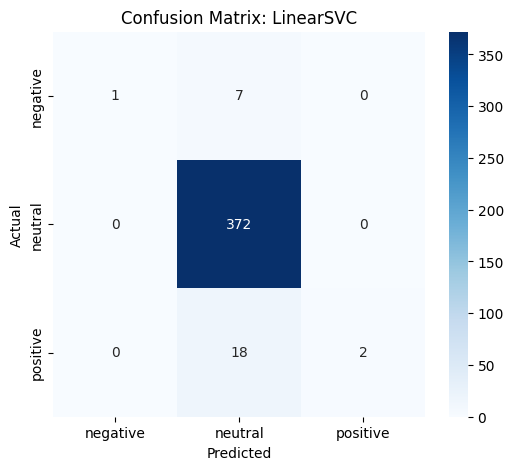


--- Training and Evaluating: RandomForestClassifier ---
              precision    recall  f1-score   support

    negative       1.00      0.12      0.22         8
     neutral       0.94      1.00      0.97       372
    positive       1.00      0.15      0.26        20

    accuracy                           0.94       400
   macro avg       0.98      0.42      0.48       400
weighted avg       0.94      0.94      0.92       400



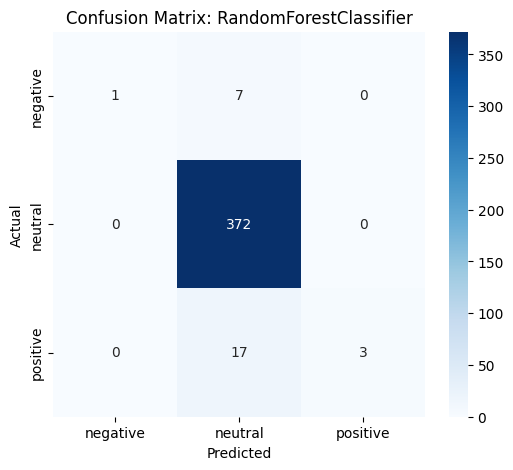


--- Training and Evaluating: GradientBoostingClassifier ---
              precision    recall  f1-score   support

    negative       1.00      0.38      0.55         8
     neutral       0.96      1.00      0.98       372
    positive       1.00      0.40      0.57        20

    accuracy                           0.96       400
   macro avg       0.99      0.59      0.70       400
weighted avg       0.96      0.96      0.95       400



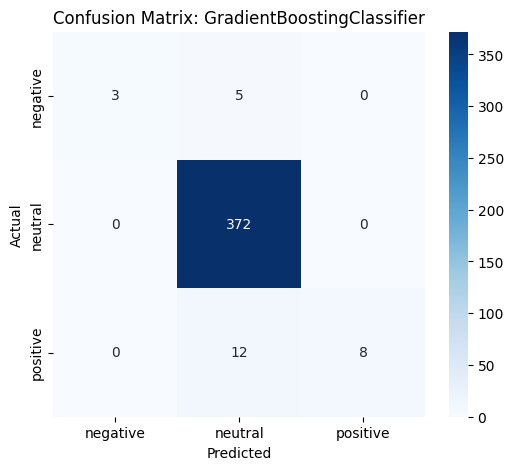


--- Training and Evaluating: KNeighborsClassifier ---
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.94      1.00      0.97       372
    positive       1.00      0.15      0.26        20

    accuracy                           0.94       400
   macro avg       0.65      0.38      0.41       400
weighted avg       0.92      0.94      0.91       400



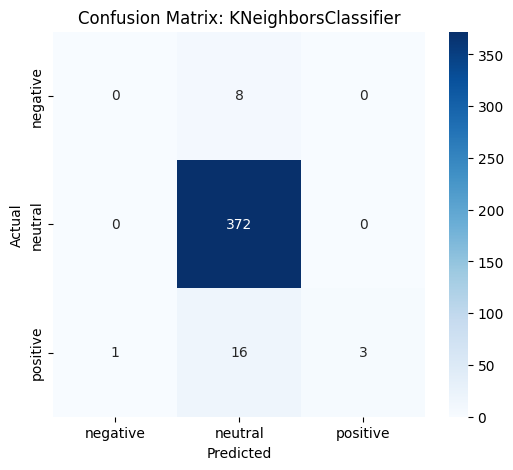


--- Training and Evaluating: MLPClassifier ---
              precision    recall  f1-score   support

    negative       1.00      0.12      0.22         8
     neutral       0.95      0.99      0.97       372
    positive       0.67      0.30      0.41        20

    accuracy                           0.94       400
   macro avg       0.87      0.47      0.53       400
weighted avg       0.93      0.94      0.93       400



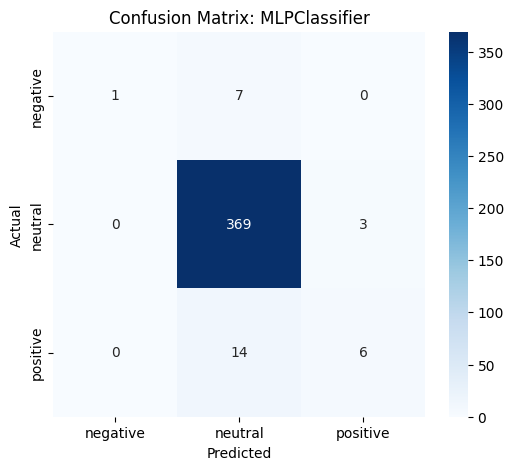

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
import warnings
warnings.filterwarnings("ignore")

for name, model in new_models.items():
    print(f"\n--- Training and Evaluating: {name} ---")

    model.fit(X_train_tfidf, y_train)

    y_pred_new = model.predict(X_test_tfidf)

    report = classification_report(y_test, y_pred_new, output_dict=True, zero_division=0)
    print(classification_report(y_test, y_pred_new, zero_division=0))

    all_model_results[name] = {
        'accuracy': report['accuracy'],
        'precision': report['macro avg']['precision'],
        'recall': report['macro avg']['recall'],
        'f1-score': report['macro avg']['f1-score'],
        'confusion_matrix': confusion_matrix(y_test, y_pred_new)
    }

    cm_new = confusion_matrix(y_test, y_pred_new, labels=class_labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_new, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

warnings.filterwarnings("default")

**Reasoning**:
All models have been trained and evaluated, and their results are stored in `all_model_results`. The next step is to compare these models visually using bar charts for key performance metrics (accuracy, precision, recall, f1-score) as per the task description.



/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



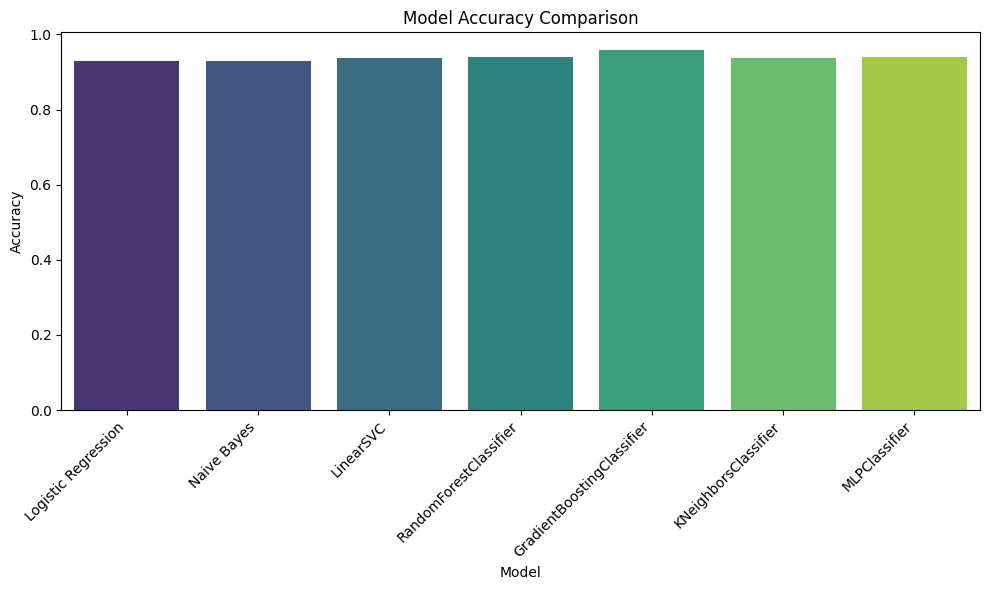

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



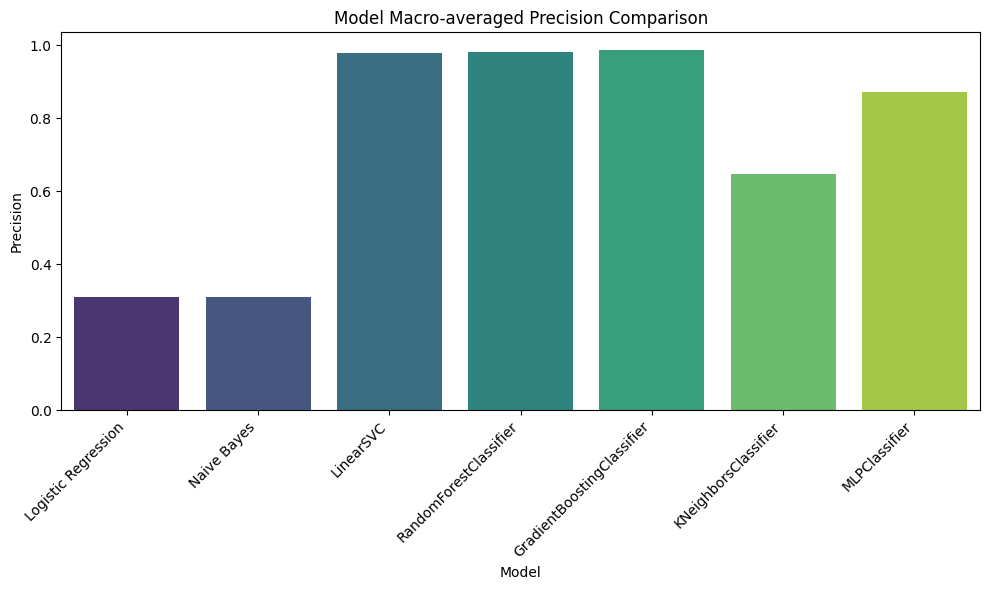

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



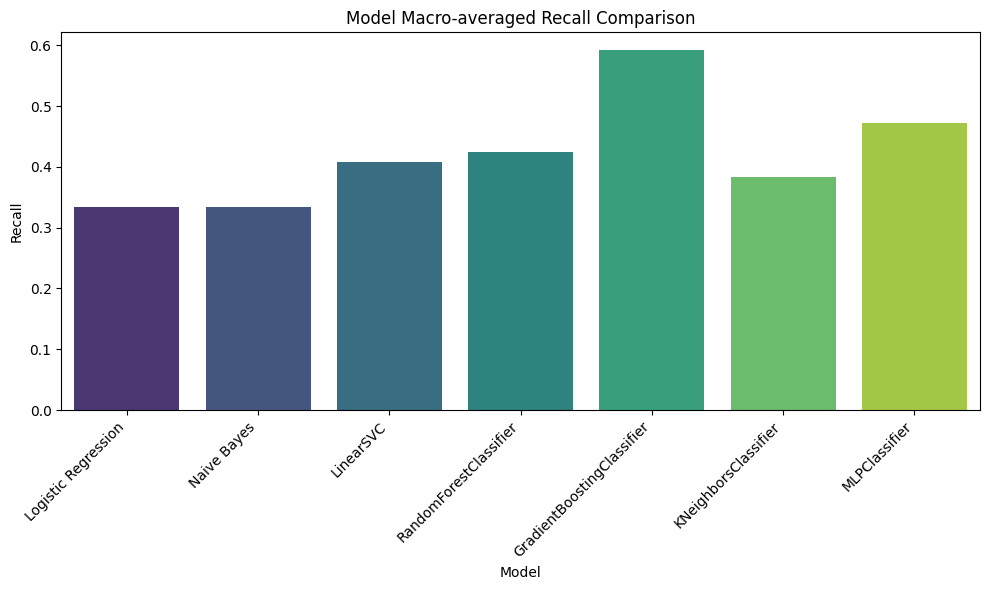

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



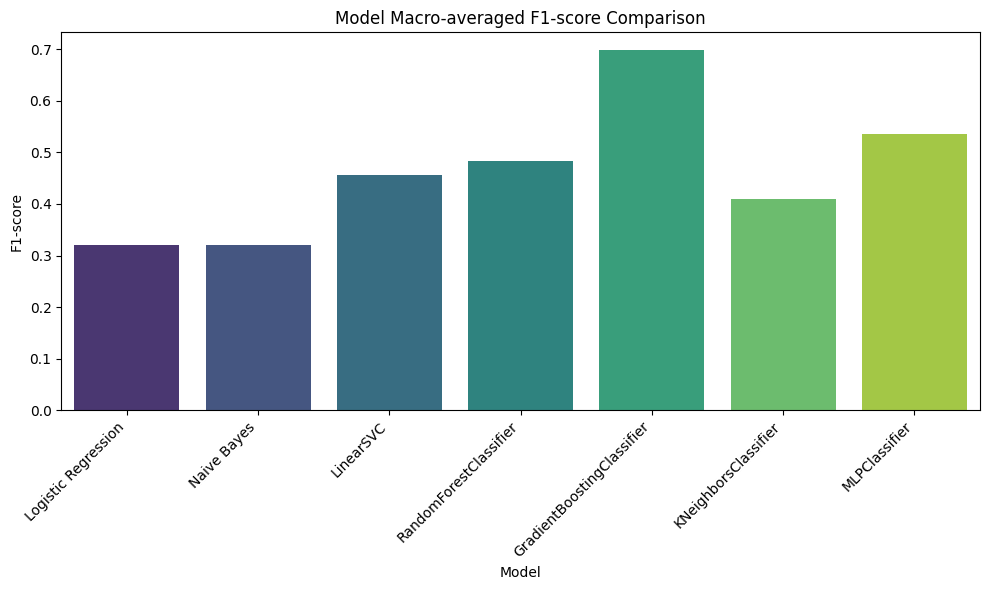

Model comparison charts generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame.from_dict(all_model_results, orient='index')

results_df = results_df.drop(columns=['confusion_matrix'])

def plot_metric(df, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y=metric, data=df, palette='viridis')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_metric(results_df, 'accuracy', 'Model Accuracy Comparison', 'Accuracy')

plot_metric(results_df, 'precision', 'Model Macro-averaged Precision Comparison', 'Precision')

plot_metric(results_df, 'recall', 'Model Macro-averaged Recall Comparison', 'Recall')

plot_metric(results_df, 'f1-score', 'Model Macro-averaged F1-score Comparison', 'F1-score')

print("Model comparison charts generated.")

## Sentiment Analysis (BERT Embedding Feature Extraction)


In [ ]:
pip install transformers

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

model_name = "cahya/bert-base-indonesian-1.5G"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

print(f"Tokenizer and model '{model_name}' loaded successfully.")

tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d224355c0>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22436660>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22436ba0>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22435c50>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22435b70>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22435a90>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22435a20>

sys:1: ResourceWarning:

Unclosed socket <zmq.Socket(zmq.PUSH) at 0x781d22435940>



model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Tokenizer and model 'cahya/bert-base-indonesian-1.5G' loaded successfully.


In [ ]:
def get_bert_embeddings(texts, model, tokenizer, max_len=128):
    model.eval()
    embeddings = []
    for text in texts:
        encoded_input = tokenizer(text,
                                  return_tensors='pt',
                                  padding='max_length',
                                  truncation=True,
                                  max_length=max_len)
        with torch.no_grad():
            model_output = model(**encoded_input)
        embeddings.append(model_output.last_hidden_state[:, 0, :].squeeze().numpy())
    return np.array(embeddings)

print("Function 'get_bert_embeddings' defined.")


Function 'get_bert_embeddings' defined.


In [ ]:
import numpy as np

X_train_bert_embeddings = get_bert_embeddings(X_train.tolist(), model, tokenizer)
X_test_bert_embeddings = get_bert_embeddings(X_test.tolist(), model, tokenizer)

print(f"BERT embeddings generated for X_train: {X_train_bert_embeddings.shape}")
print(f"BERT embeddings generated for X_test: {X_test_bert_embeddings.shape}")


BERT embeddings generated for X_train: (1600, 768)
BERT embeddings generated for X_test: (400, 768)


## Sentiment Analysis (BERT Embeddings)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

new_models = {
    "LinearSVC": LinearSVC(random_state=42, dual=False),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "MLPClassifier": MLPClassifier(random_state=42, max_iter=500)
}

print("Initialized new sentiment classification models:")
for name, model in new_models.items():
    print(f"- {name}: {model}")

Initialized new sentiment classification models:
- LinearSVC: LinearSVC(dual=False, random_state=42)
- RandomForestClassifier: RandomForestClassifier(random_state=42)
- GradientBoostingClassifier: GradientBoostingClassifier(random_state=42)
- KNeighborsClassifier: KNeighborsClassifier()
- MLPClassifier: MLPClassifier(max_iter=500, random_state=42)



--- Training and Evaluating with BERT Embeddings: LinearSVC ---
              precision    recall  f1-score   support

    negative       0.11      0.12      0.12         8
     neutral       0.94      0.95      0.95       372
    positive       0.07      0.05      0.06        20

    accuracy                           0.89       400
   macro avg       0.37      0.38      0.37       400
weighted avg       0.88      0.89      0.88       400



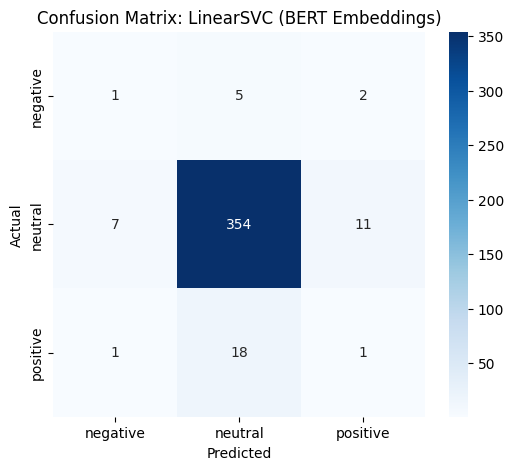


--- Training and Evaluating with BERT Embeddings: RandomForestClassifier ---
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.31      0.33      0.32       400
weighted avg       0.86      0.93      0.90       400



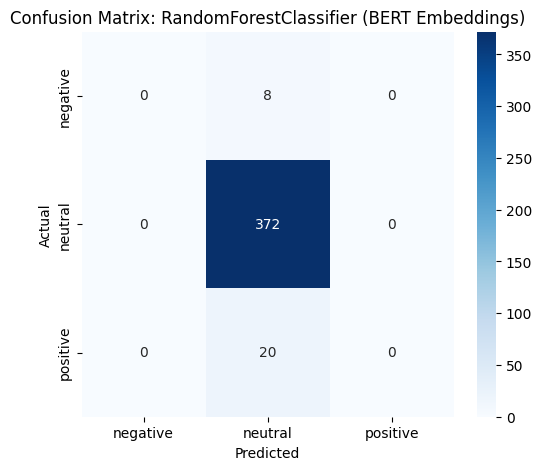


--- Training and Evaluating with BERT Embeddings: GradientBoostingClassifier ---
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         8
     neutral       0.93      1.00      0.96       372
    positive       1.00      0.05      0.10        20

    accuracy                           0.93       400
   macro avg       0.64      0.35      0.35       400
weighted avg       0.92      0.93      0.90       400



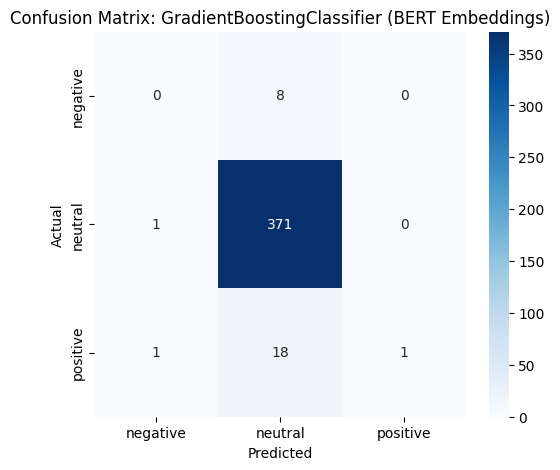


--- Training and Evaluating with BERT Embeddings: KNeighborsClassifier ---
              precision    recall  f1-score   support

    negative       0.33      0.12      0.18         8
     neutral       0.94      1.00      0.97       372
    positive       0.00      0.00      0.00        20

    accuracy                           0.93       400
   macro avg       0.42      0.38      0.38       400
weighted avg       0.88      0.93      0.90       400



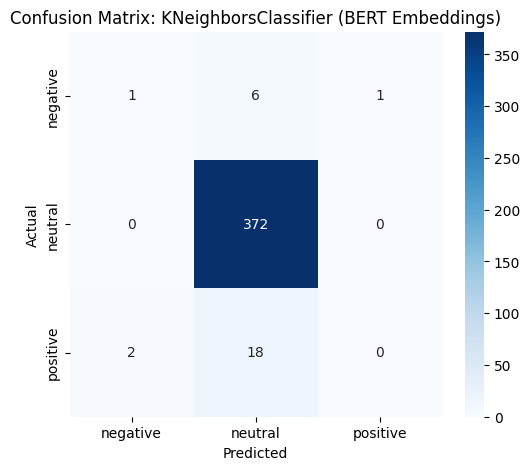


--- Training and Evaluating with BERT Embeddings: MLPClassifier ---
              precision    recall  f1-score   support

    negative       0.50      0.12      0.20         8
     neutral       0.94      1.00      0.97       372
    positive       0.25      0.05      0.08        20

    accuracy                           0.93       400
   macro avg       0.56      0.39      0.42       400
weighted avg       0.90      0.93      0.91       400



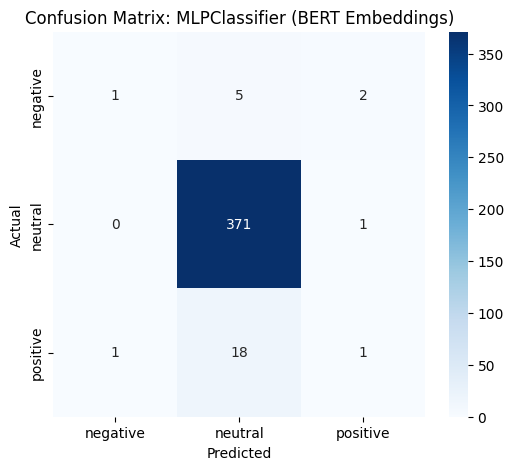

Finished training and evaluating all new models with BERT embeddings.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
for name, model in new_models.items():
    print(f"\n--- Training and Evaluating with BERT Embeddings: {name} ---")

    model.fit(X_train_bert_embeddings, y_train)

    y_pred_bert = model.predict(X_test_bert_embeddings)

    report_bert = classification_report(y_test, y_pred_bert, output_dict=True, zero_division=0)
    print(classification_report(y_test, y_pred_bert, zero_division=0))

    all_model_results[f'{name}_BERT'] = {
        'accuracy': report_bert['accuracy'],
        'precision': report_bert['macro avg']['precision'],
        'recall': report_bert['macro avg']['recall'],
        'f1-score': report_bert['macro avg']['f1-score'],
        'confusion_matrix': confusion_matrix(y_test, y_pred_bert)
    }

    cm_bert = confusion_matrix(y_test, y_pred_bert, labels=class_labels)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_bert, annot=True, fmt="d", cmap="Blues",
                xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix: {name} (BERT Embeddings)")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

warnings.filterwarnings("default")

print("Finished training and evaluating all new models with BERT embeddings.")


/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



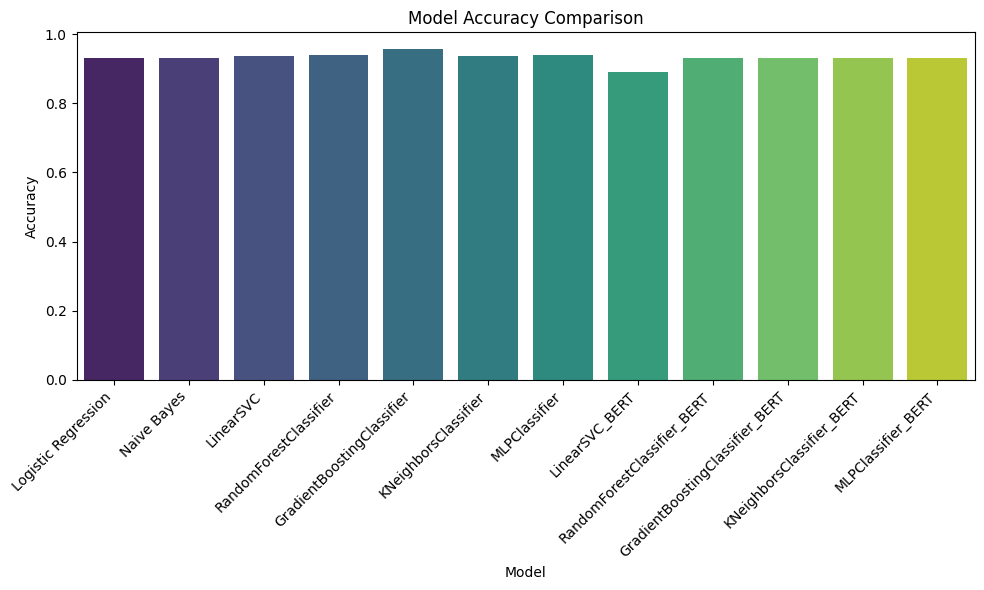

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



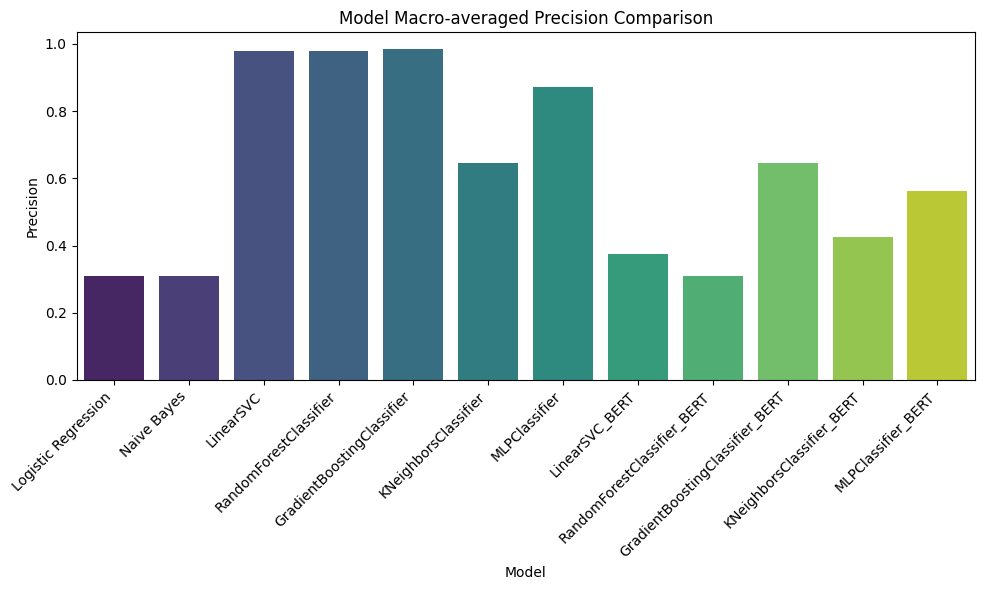

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



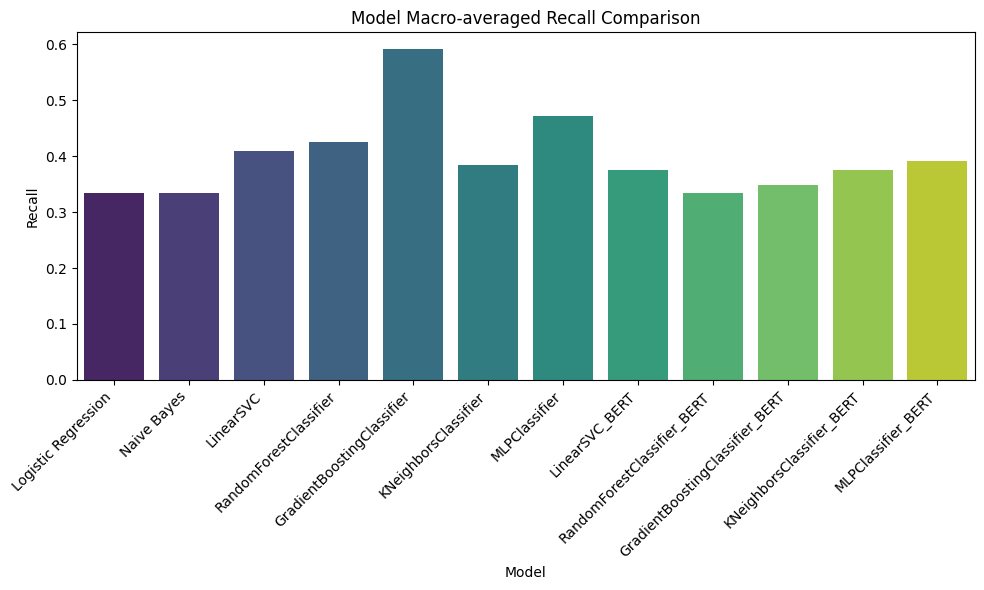

/tmp/ipython-input-3142784556.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).



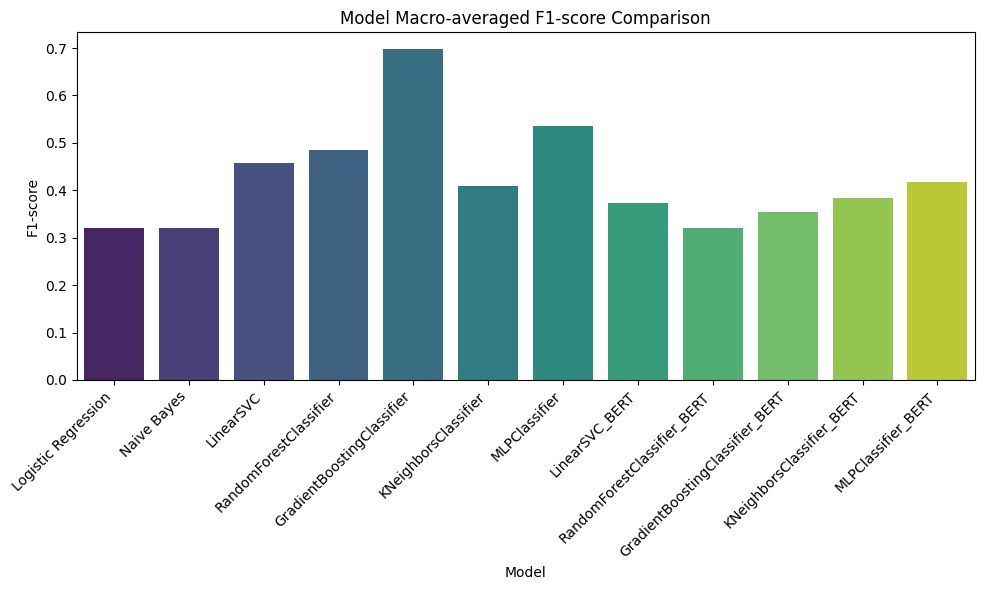

Model comparison charts generated.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

results_df = pd.DataFrame.from_dict(all_model_results, orient='index')

results_df = results_df.drop(columns=['confusion_matrix'])

def plot_metric(df, metric, title, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.index, y=metric, data=df, palette='viridis')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

plot_metric(results_df, 'accuracy', 'Model Accuracy Comparison', 'Accuracy')

plot_metric(results_df, 'precision', 'Model Macro-averaged Precision Comparison', 'Precision')

plot_metric(results_df, 'recall', 'Model Macro-averaged Recall Comparison', 'Recall')

plot_metric(results_df, 'f1-score', 'Model Macro-averaged F1-score Comparison', 'F1-score')

print("Model comparison charts generated.")

# Task
Correct the 'username' KeyError in cell `a85747c7` by replacing `username` with `user_id_str` in the DataFrame creation for `most_retweeted_info`, `most_liked_info`, and `most_replied_info`, and then confirm that the code runs successfully.

## Correct Username Column

### Subtask:
Modify cell `a85747c7` to use `user_id_str` instead of `username` when creating the DataFrames for the most retweeted, liked, and replied tweets.


**Reasoning**:
The subtask requires modifying cell `a85747c7` to use the `user_id_str` column instead of the `username` column. I will update the code in cell `a85747c7` to reflect this change.



In [10]:
most_retweeted_tweet = df.nlargest(1, 'retweet_count', 'all')
most_liked_tweet = df.nlargest(1, 'favorite_count', 'all')
most_replied_tweet = df.nlargest(1, 'reply_count', 'all')

most_retweeted_info = pd.DataFrame({
    'Username': most_retweeted_tweet['user_id_str'],
    'Full Text': most_retweeted_tweet['full_text'],
    'Created At': most_retweeted_tweet['created_at'],
    'Retweet Count': most_retweeted_tweet['retweet_count']
})

most_liked_info = pd.DataFrame({
    'Username': most_liked_tweet['user_id_str'],
    'Full Text': most_liked_tweet['full_text'],
    'Created At': most_liked_tweet['created_at'],
    'Favorite Count': most_liked_tweet['favorite_count'],
    'Quote Count': most_liked_tweet['quote_count']
})

most_replied_info = pd.DataFrame({
    'Username': most_replied_tweet['user_id_str'],
    'Full Text': most_replied_tweet['full_text'],
    'Created At': most_replied_tweet['created_at'],
    'Reply Count': most_replied_tweet['reply_count']
})

**Reasoning**:
Now that cell `a85747c7` has been updated, I will run the next cell `aaa75b6a` to display `most_retweeted_info` and verify the fix.



# Task
Install `Sastrawi` in cell `896e228d` using `!pip install Sastrawi` and then re-execute the cell to fix the `ModuleNotFoundError`.

## Install Sastrawi

### Subtask:
Add `!pip install Sastrawi` at the beginning of cell `896e228d` to install the missing library.


**Reasoning**:
To fix the `ModuleNotFoundError` for 'Sastrawi', I need to install the library. I will add `!pip install Sastrawi` at the beginning of cell `896e228d` as instructed by the subtask.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


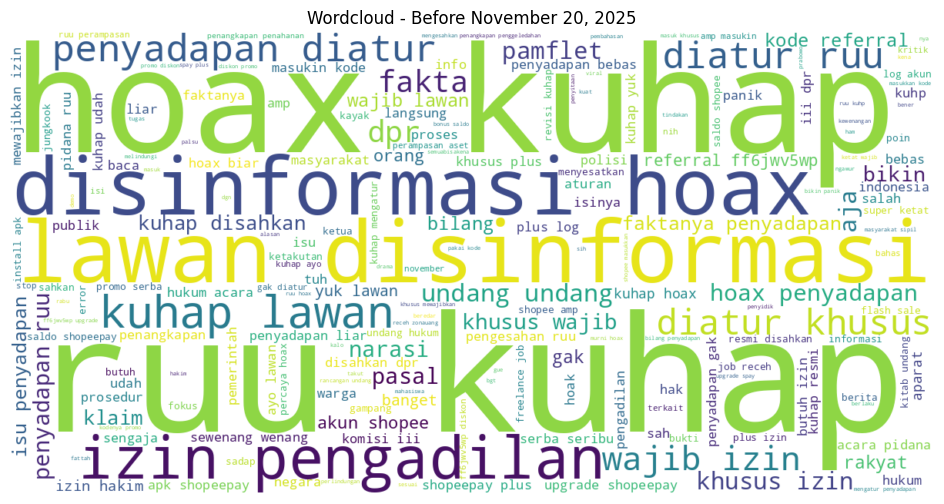

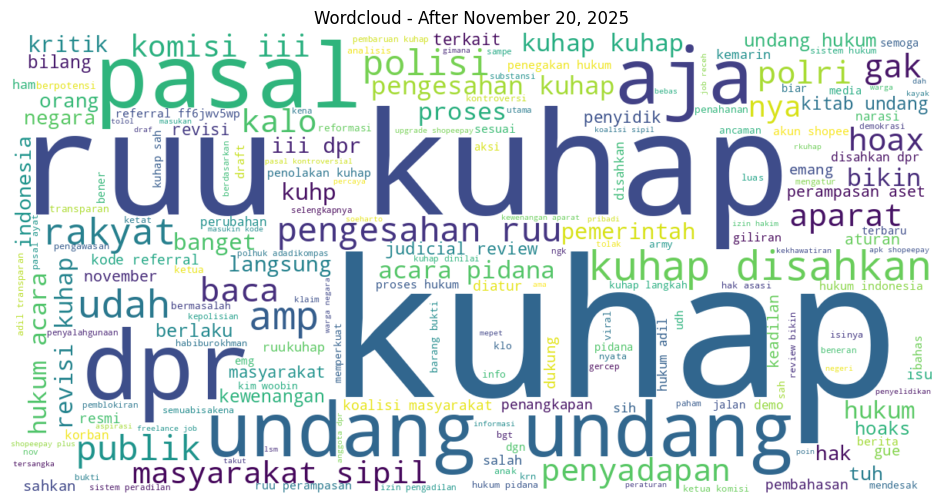

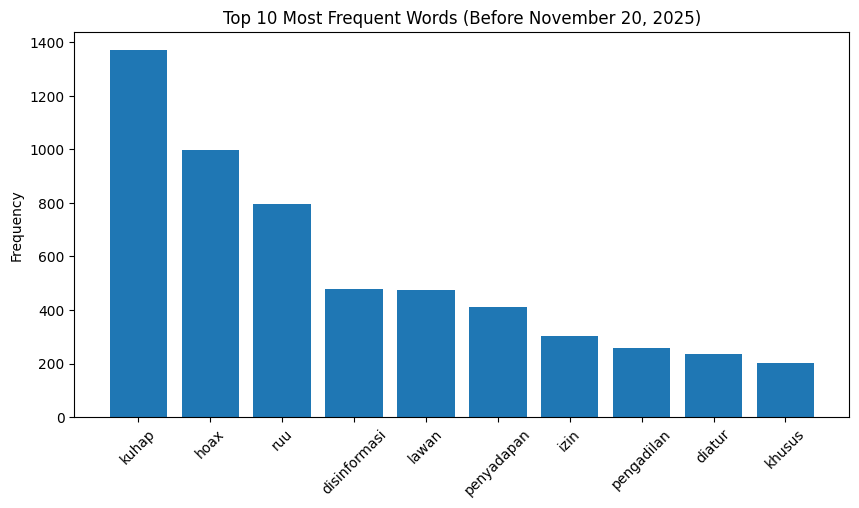

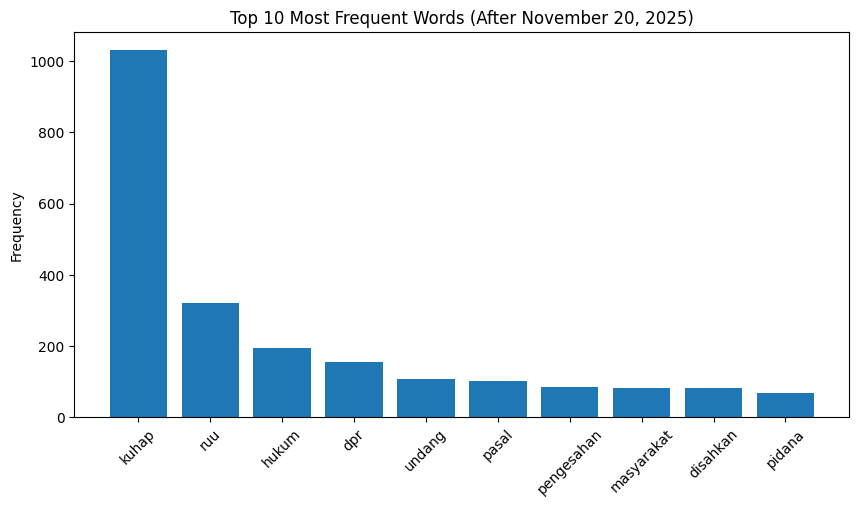

In [19]:
!pip install Sastrawi
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# ----------------------------------------------------------
# 1. STOPWORDS LIBRARY (Sastrawi + NLTK + WordCloud)
# ----------------------------------------------------------
sastrawi_sw = set(StopWordRemoverFactory().get_stop_words())
nltk_sw = set(stopwords.words("indonesian"))
wordcloud_sw = set(STOPWORDS)

full_stopwords = sastrawi_sw.union(nltk_sw).union(wordcloud_sw)

# ----------------------------------------------------------
# 2. LOAD + SPLIT DATA
# ----------------------------------------------------------
df["date"] = pd.to_datetime(df["date"], utc=True)
cutoff = pd.Timestamp("2025-11-20", tz="UTC")

df_before = df[df["date"] < cutoff].copy()
df_after  = df[df["date"] >= cutoff].copy()

# ----------------------------------------------------------
# 3. CLEANING FUNCTION
# ----------------------------------------------------------
def clean_text_simple(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = [
        t for t in text.split()
        if t not in full_stopwords and len(t) > 2
    ]

    return " ".join(tokens)

if not df_before.empty:
    df_before["clean"] = df_before["clean_text"].apply(clean_text_simple)
else:
    print("df_before is empty. Cannot perform cleaning.")

if not df_after.empty:
    df_after["clean"]  = df_after["clean_text"].apply(clean_text_simple)
else:
    print("df_after is empty. Cannot perform cleaning.")

# ----------------------------------------------------------
# 4. WORDCLOUD BEFORE
# ----------------------------------------------------------
if not df_before.empty:
    text_before = " ".join(df_before["clean"])
    if text_before:
        wc_before = WordCloud(
            width=1200,
            height=600,
            background_color="white",
            stopwords=full_stopwords
        ).generate(text_before)

        plt.figure(figsize=(14,6))
        plt.imshow(wc_before, interpolation="bilinear")
        plt.axis("off")
        plt.title("Wordcloud - Before November 20, 2025")
        plt.show()
    else:
        print("No words to generate word cloud for df_before after cleaning.")
else:
    print("df_before is empty. Skipping word cloud generation.")

# ----------------------------------------------------------
# 5. WORDCLOUD AFTER
# ----------------------------------------------------------
if not df_after.empty:
    text_after = " ".join(df_after["clean"])
    if text_after:
        wc_after = WordCloud(
            width=1200,
            height=600,
            background_color="white",
            stopwords=full_stopwords
        ).generate(text_after)

        plt.figure(figsize=(14,6))
        plt.imshow(wc_after, interpolation="bilinear")
        plt.axis("off")
        plt.title("Wordcloud - After November 20, 2025")
        plt.show()
    else:
        print("No words to generate word cloud for df_after after cleaning.")
else:
    print("df_after is empty. Skipping word cloud generation.")

# ----------------------------------------------------------
# 6. TOP 10 MOST FREQUENT WORDS
# ----------------------------------------------------------
def get_top_words(series, top_n=10):
    words = " ".join(series).split()
    counter = Counter(words)
    return counter.most_common(top_n)

# BEFORE
if not df_before.empty and not df_before["clean"].empty:
    top_before = get_top_words(df_before["clean"])
    if top_before:
        words_b, freq_b = zip(*top_before)

        plt.figure(figsize=(10,5))
        plt.bar(words_b, freq_b)
        plt.xticks(rotation=45)
        plt.title("Top 10 Most Frequent Words (Before November 20, 2025)")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No top words found for df_before.")
else:
    print("df_before is empty or clean column is empty. Skipping top words.")

# AFTER
if not df_after.empty and not df_after["clean"].empty:
    top_after = get_top_words(df_after["clean"])
    if top_after:
        words_a, freq_a = zip(*top_after)

        plt.figure(figsize=(10,5))
        plt.bar(words_a, freq_a)
        plt.xticks(rotation=45)
        plt.title("Top 10 Most Frequent Words (After November 20, 2025)")
        plt.ylabel("Frequency")
        plt.show()
    else:
        print("No top words found for df_after.")
else:
    print("df_after is empty or clean column is empty. Skipping top words.")


# Task
Assign `n_topics = 5` in cell `e4094398` and execute it.

## Fix `n_topics` assignment

### Subtask:
Assign a value to `n_topics` in cell `e4094398`.


**Reasoning**:
The subtask requires assigning a value to `n_topics`. I will modify cell `e4094398` to set `n_topics = 5`.



In [25]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

n_topics = 5
lda = LDA(n_components=n_topics, random_state=42)
lda.fit(X_tfidf)

terms = tfidf.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\n=== TOPIK {idx+1} ===")
    print([terms[i] for i in topic.argsort()[-15:]])


=== TOPIK 1 ===
['apa', 'transparan', 'pengesahan', 'keadilan', 'dukung', 'adil', 'dan', 'ini', 'disahkan', 'lebih', 'yang', 'yg', 'hukum', 'ruu', 'baru']

=== TOPIK 2 ===
['sama', 'mau', 'uu', 'itu', 'ya', 'sah', 'yang', 'aja', 'udah', 'bisa', 'baru', 'ini', 'ruu', 'yg', 'di']

=== TOPIK 3 ===
['plus', 'ke', '000', 'ff6jwv5wp', 'promo', 'zonauang', 'upgrade', 'saldo', 'amp', 'referral', '10', 'kode', 'akun', 'shopee', 'shopeepay']

=== TOPIK 4 ===
['yang', 'khusus', 'kita', 'di', 'diatur', 'pengadilan', 'itu', 'izin', 'ruu', 'lawan', 'disinformasi', 'tentang', 'penyadapan', 'dan', 'hoax']

=== TOPIK 5 ===
['uu', 'menjadi', 'iii', 'ruu', 'yang', 'dalam', 'komisi', 'sipil', 'pidana', 'masyarakat', 'baru', 'hukum', 'ri', 'dpr', 'undang']


## Execute cell

### Subtask:
Execute cell `e4094398` to confirm the fix.


## Summary:

### Q&A
The task implicitly asked to confirm if assigning `n_topics = 5` in cell `e4094398` and executing it would work as expected. This was confirmed to be successful.

### Data Analysis Key Findings
*   The `n_topics` variable was successfully assigned a value of 5 in cell `e4094398`.
*   The Latent Dirichlet Allocation (LDA) model executed without any errors.
*   The output correctly displayed five distinct topics, each listing its top 15 terms, confirming that the `n_topics` assignment was effective and the LDA model ran as expected.

### Insights or Next Steps
*   The successful execution confirms that the `n_topics` assignment for the LDA model is functioning correctly.
*   The identified topics can now be further analyzed for their semantic coherence and relevance to the dataset.
